#### Problem Statements :
Sebuah perusahaan asuransi ingin mengetahui cara yang lebih cepat untuk melakukan proses verifikasi data persetujuan peminjaman. 
Anda diminta untuk melakukan pemodelan Machine Learning untuk membantu permasalahan perusahaan tersebut.
Berikut penjelasan dataset :
<br>
person_age: Kolom ini mewakili usia 
<br>
person_income: Kolom ini mewakili pendapatan seseorang
<br>
person_home_ownership: Kolom ini mewakili jenis kepemilikan rumah seseorang 
<br>
person_emp_length: Kolom ini mewakili lama kerja seseorang dalam tahun
<br>
loan_intent: Kolom ini mewakili tujuan atau maksud pengajuan pinjaman 
<br>
loan_grade: Kolom ini mewakili kelas pinjaman 
<br>
loan_amnt: Kolom ini mewakili jumlah pinjaman yang diminta
<br>
loan_int_rate: Kolom ini mewakili tingkat bunga pinjaman
<br>
loan_status: Kolom ini mewakili status pinjaman
<br>
loan_percent_income: Kolom ini mewakili jumlah pinjaman
<br>
cb_person_default_on_file: Kolom ini mewakili apakah seseorang memiliki riwayat gagal bayar di catatan mereka 
<br>
cb_person_cred_hist_length: Kolom ini kemungkinan mewakili lama riwayat kredit seseorang

In [4]:
#melakukan import library untuk data processing dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(r'CreditRiskDataset.xlsx')

In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [7]:
 #melakukan pengecekan data duplikat
duplicate_rows = df[df.duplicated()]
duplicate_rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [8]:
#Menghapus data yang duplikat
dfd = df.drop_duplicates()

In [9]:
dfd.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.00,32416.00,31529.00,32416.00,29321.00,32416.00,32416.00,32416.00
mean,27.75,66091.64,4.79,9593.85,11.02,0.22,0.17,5.81
std,6.35,62015.58,4.15,6322.73,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38542.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79218.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [10]:
#cek presentase nilai kosong
percentage_null = (dfd.isnull().mean() * 100).round(2)

null_summary = pd.DataFrame({'Nama Kolom': percentage_null.index, 'Presentase nilai null': percentage_null.values})

print(null_summary)

                    Nama Kolom  Presentase nilai null
0                   person_age                   0.00
1                person_income                   0.00
2        person_home_ownership                   0.00
3            person_emp_length                   2.74
4                  loan_intent                   0.00
5                   loan_grade                   0.00
6                    loan_amnt                   0.00
7                loan_int_rate                   9.55
8                  loan_status                   0.00
9          loan_percent_income                   0.00
10   cb_person_default_on_file                   0.00
11  cb_person_cred_hist_length                   0.00


Untuk menangani nilai kosong, diperlukan analisis lebih lanjut.

#### Explore Univariate analysis
Analisa univariat ini bertujuan untuk menjelaskan atau mendeskripsikan karakteristik masing-masing variabel yang diteliti.
Pembagian antara kolom numerik dan kategorikal akan dilakukan guna mempermudah visualisasi data.

In [11]:
#Merubah kolom loan status menjadi kategorikal
mapping = {0: 'No', 1: 'Yes'}
dfd['loan_status_categorical'] = dfd['loan_status'].apply(lambda x: mapping[x])

C:\Users\adeputri\AppData\Local\Temp\ipykernel_21764\2617671823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['loan_status_categorical'] = dfd['loan_status'].apply(lambda x: mapping[x])


In [12]:
num_columns = dfd.select_dtypes(include=['int64','float64'])
num_columns.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


In [13]:
cat_columns = dfd.select_dtypes(include=['object'])
cat_columns.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status_categorical
0,RENT,PERSONAL,D,Y,Yes
1,OWN,EDUCATION,B,N,No
2,MORTGAGE,MEDICAL,C,N,Yes
3,RENT,MEDICAL,C,N,Yes
4,RENT,MEDICAL,C,Y,Yes


In [14]:
num_columns.drop(columns=['loan_status'],inplace=True)

Distribusi per kolom numerik

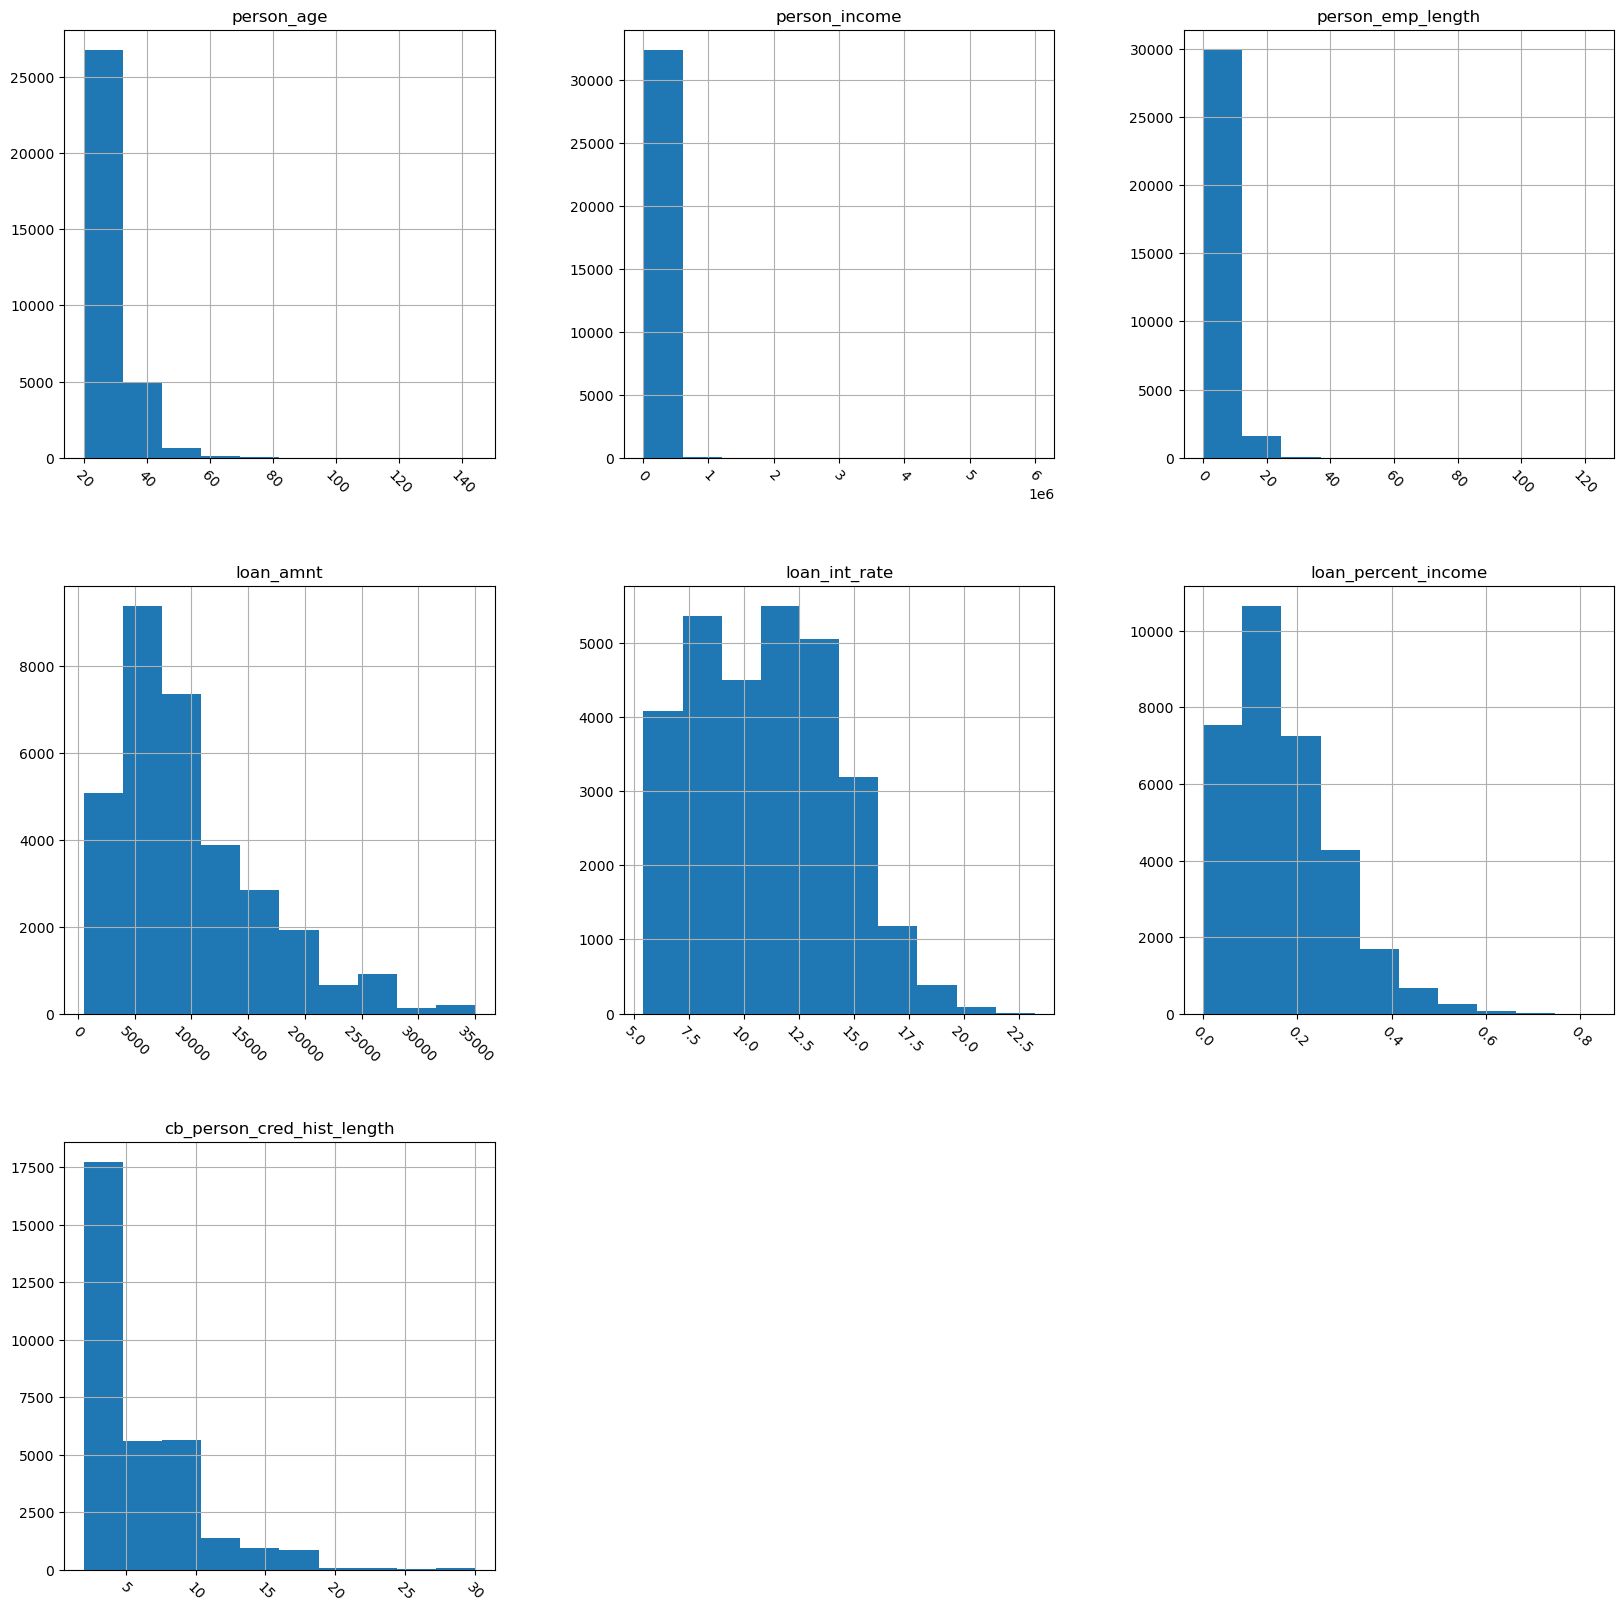

In [55]:
num_columns.hist(figsize=(20,20), xrot=-45)
plt.show()

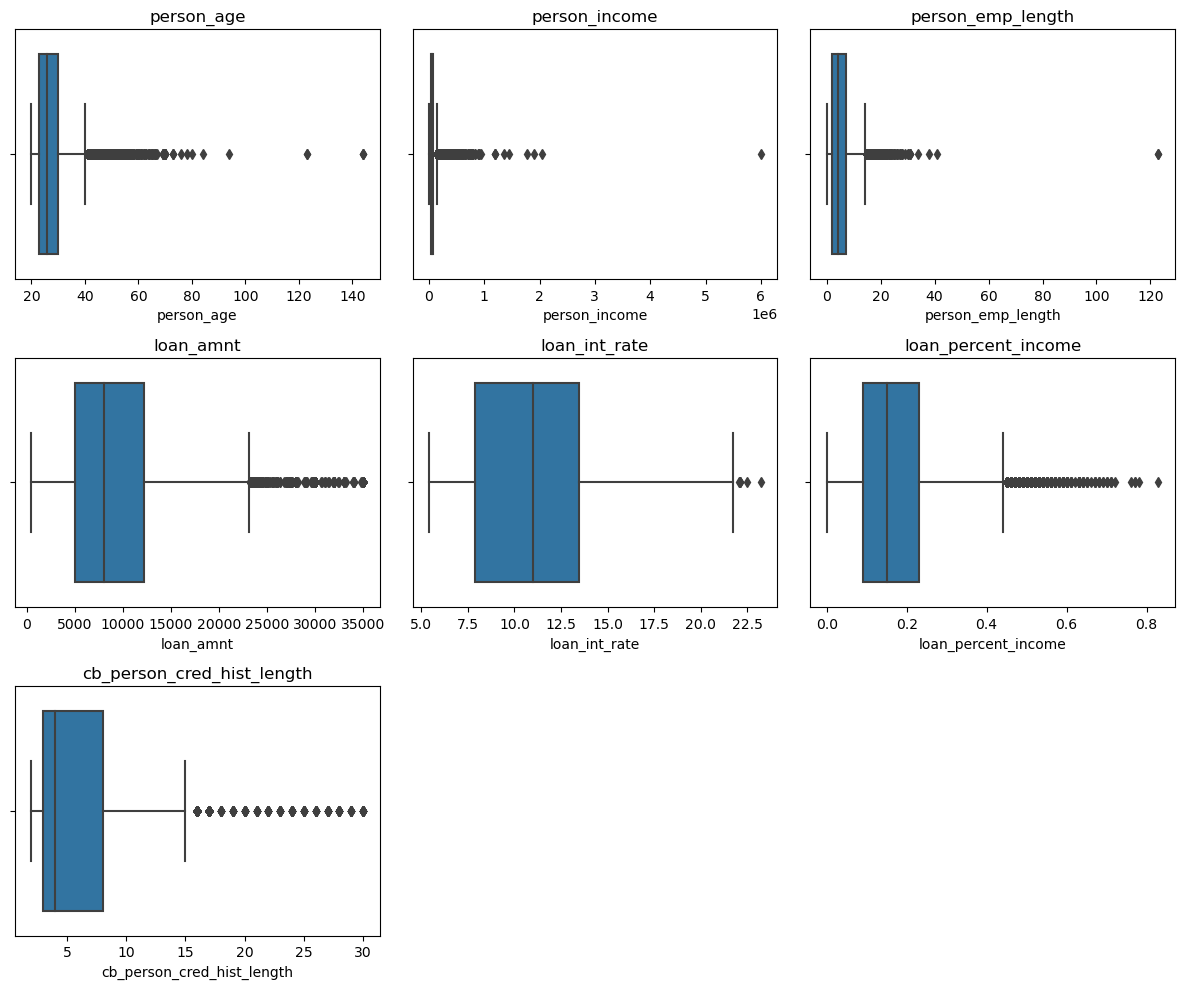

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

axes = axes.flatten()

for i, column in enumerate(num_columns.columns):
    sns.boxplot(x = num_columns[column], ax=axes[i])
    axes[i].set_title(column)

for j in range(len(num_columns.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

Dari kedua visualisasi diatas, ditemukan banyak outliers pada data. 
Nilai distribusi data diketahui tidak merata karena terdapat values yang memiliki persebaran data yang lebih banyak dari yang lain.

In [57]:
whisker_min = num_columns.describe().loc['min']
whisker_max = num_columns.describe().loc['max']
print('==========================================')
print("Minimum Whisker:")
print(whisker_min)
print()
print('==========================================')
print("Maximum Whisker:")
print(whisker_max)

Minimum Whisker:
person_age                      20.00
person_income                 4000.00
person_emp_length                0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
Name: min, dtype: float64

Maximum Whisker:
person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
Name: max, dtype: float64


In [58]:
#Menghitung outliers dan jumlahnya
def analyze_column_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    count = outliers.count()
    proportion = (count / len(column)) * 100
    return count, proportion, outliers.tolist()

column_analysis_IQR = {}
for column in num_columns.columns:
    count, proportion, outliers = analyze_column_IQR(num_columns[column])
    column_analysis_IQR[column] = {'Count': count, 'Proportion': proportion, 'Outliers': outliers}

for column, analysis in column_analysis_IQR.items():
    print(f"Column: {column}")
    print(f"Count: {analysis['Count']}")
    print(f"Proportion: {analysis['Proportion']}")
    print(f"Outliers: {analysis['Outliers']}")
    print()

Column: person_age
Count: 1491
Proportion: 4.599580454096743
Outliers: [144, 144, 123, 123, 50, 45, 44, 43, 41, 43, 43, 46, 44, 43, 47, 46, 42, 47, 41, 43, 44, 41, 41, 48, 45, 43, 42, 45, 41, 45, 44, 42, 45, 41, 45, 50, 41, 41, 47, 44, 46, 44, 46, 43, 42, 45, 49, 45, 47, 44, 41, 46, 47, 48, 42, 50, 43, 47, 48, 41, 42, 47, 43, 42, 46, 48, 48, 45, 50, 43, 41, 50, 41, 41, 41, 45, 42, 41, 47, 42, 42, 41, 43, 43, 45, 45, 44, 43, 48, 47, 43, 44, 50, 49, 46, 42, 49, 43, 48, 44, 41, 50, 42, 48, 49, 42, 41, 46, 41, 45, 41, 44, 45, 44, 41, 45, 41, 48, 42, 50, 42, 41, 43, 41, 48, 43, 45, 44, 48, 41, 41, 45, 42, 44, 41, 49, 43, 42, 48, 47, 45, 48, 43, 42, 46, 41, 44, 48, 44, 46, 44, 41, 48, 45, 43, 44, 43, 43, 46, 49, 47, 44, 44, 42, 42, 42, 45, 42, 42, 41, 47, 47, 44, 41, 48, 41, 47, 42, 47, 41, 41, 42, 43, 47, 42, 47, 45, 47, 45, 43, 41, 46, 43, 42, 50, 44, 41, 41, 47, 41, 41, 47, 45, 42, 49, 43, 45, 48, 41, 43, 42, 42, 44, 43, 41, 41, 48, 44, 44, 44, 41, 44, 46, 44, 44, 43, 44, 44, 47, 41, 41, 

Data memiliki 3% - 5% outliers. 

In [62]:
###Metode capping untuk menangani outliers, keunggulan metode ini :
###1. Menangani data yang memiliki outliers (ekor) yang panjang
###2. Mencegah outliers membawa pengaruh besar terhadap model
###3. Mempertahankan data outliers, mengganti nilainya menjadi batas threshold
### namun metode tersebut cenderung akan membuat model melewatkan informasi yang penting
### untuk itu, menangani outliers layaknya nilai nan dengan cara imputing akan diterapkan.
lower_threshold = 0.10
upper_threshold = 0.99

quantile_ranges = {}

for column in num_columns.columns:
    lower_quantile = num_columns[column].quantile(lower_threshold)
    upper_quantile = num_columns[column].quantile(upper_threshold)
    
    quantile_ranges[column] = {
        'Lower Quantile': lower_quantile,
        'Upper Quantile': upper_quantile
    }

for column, ranges in quantile_ranges.items():
    print(f"Column: {column}")
    print(f"Lower Quantile: {ranges['Lower Quantile']}")
    print(f"Upper Quantile: {ranges['Upper Quantile']}")
    print()

Column: person_age
Lower Quantile: 22.0
Upper Quantile: 50.0

Column: person_income
Lower Quantile: 28604.0
Upper Quantile: 225000.0

Column: person_emp_length
Lower Quantile: 0.0
Upper Quantile: 18.0

Column: loan_amnt
Lower Quantile: 3000.0
Upper Quantile: 29800.0

Column: loan_int_rate
Lower Quantile: 6.91
Upper Quantile: 18.62

Column: loan_percent_income
Lower Quantile: 0.05
Upper Quantile: 0.5

Column: cb_person_cred_hist_length
Lower Quantile: 2.0
Upper Quantile: 17.0



In [16]:
##Variabel kategorikal 
cat_columns = dfd.select_dtypes(include='object')
cat_columns.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status_categorical
0,RENT,PERSONAL,D,Y,Yes
1,OWN,EDUCATION,B,N,No
2,MORTGAGE,MEDICAL,C,N,Yes
3,RENT,MEDICAL,C,N,Yes
4,RENT,MEDICAL,C,Y,Yes


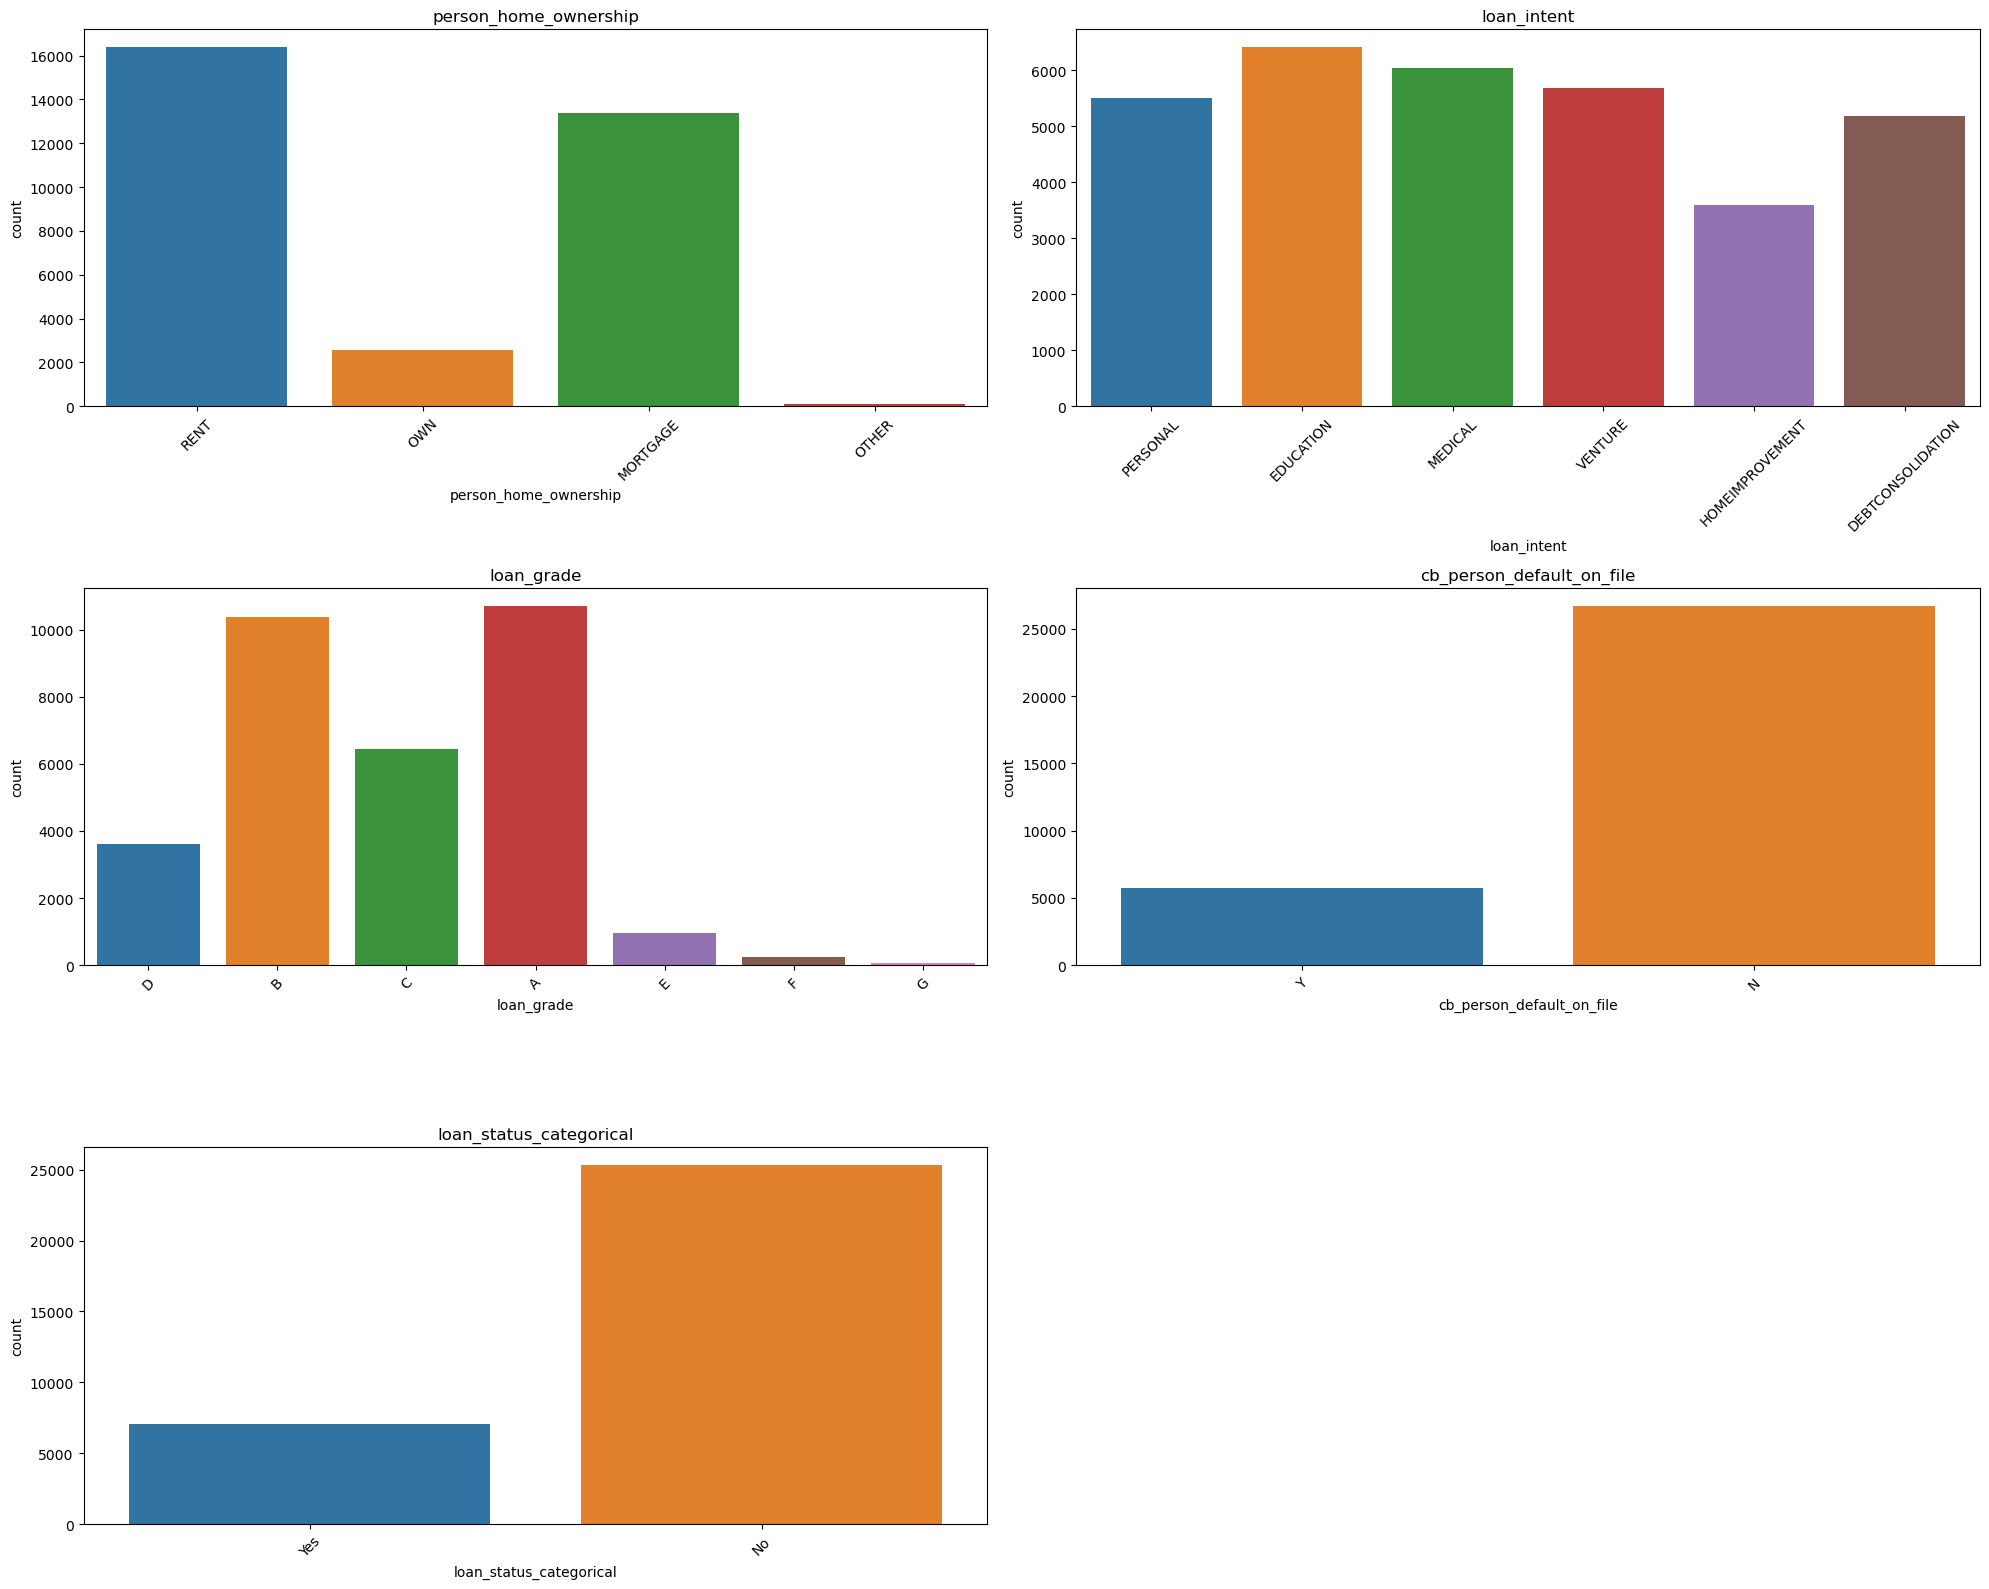

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

axes = axes.flatten()

for i, column in enumerate(cat_columns.columns):
    sns.countplot(x = cat_columns[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(len(cat_columns.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

Terdapat data yang tidak seimbang antara 1 (YES) dan 0 (NO) dari loan_status, untuk itu teknik resampling akan diimplementasikan.

#### Analisa multivariat
Analisis multivariat bertujuan untuk menganalisis secara simultan variabel lebih dari satu.

In [20]:
dfmul_num = dfd[['loan_status_categorical'] + list(dfd.select_dtypes(include=['int64','float64']).columns)]
dfmul_num.head()

,loan_status_categorical,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,Yes,22,59000,123.0,35000,16.02,1,0.59,3
1,No,21,9600,5.0,1000,11.14,0,0.10,2
2,Yes,25,9600,1.0,5500,12.87,1,0.57,3
3,Yes,23,65500,4.0,35000,15.23,1,0.53,2
4,Yes,24,54400,8.0,35000,14.27,1,0.55,4


In [25]:
dfmul_num.drop(columns=['loan_status'],inplace=True)

C:\Users\adeputri\AppData\Local\Temp\ipykernel_21764\3684298128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmul_num.drop(columns=['loan_status'],inplace=True)


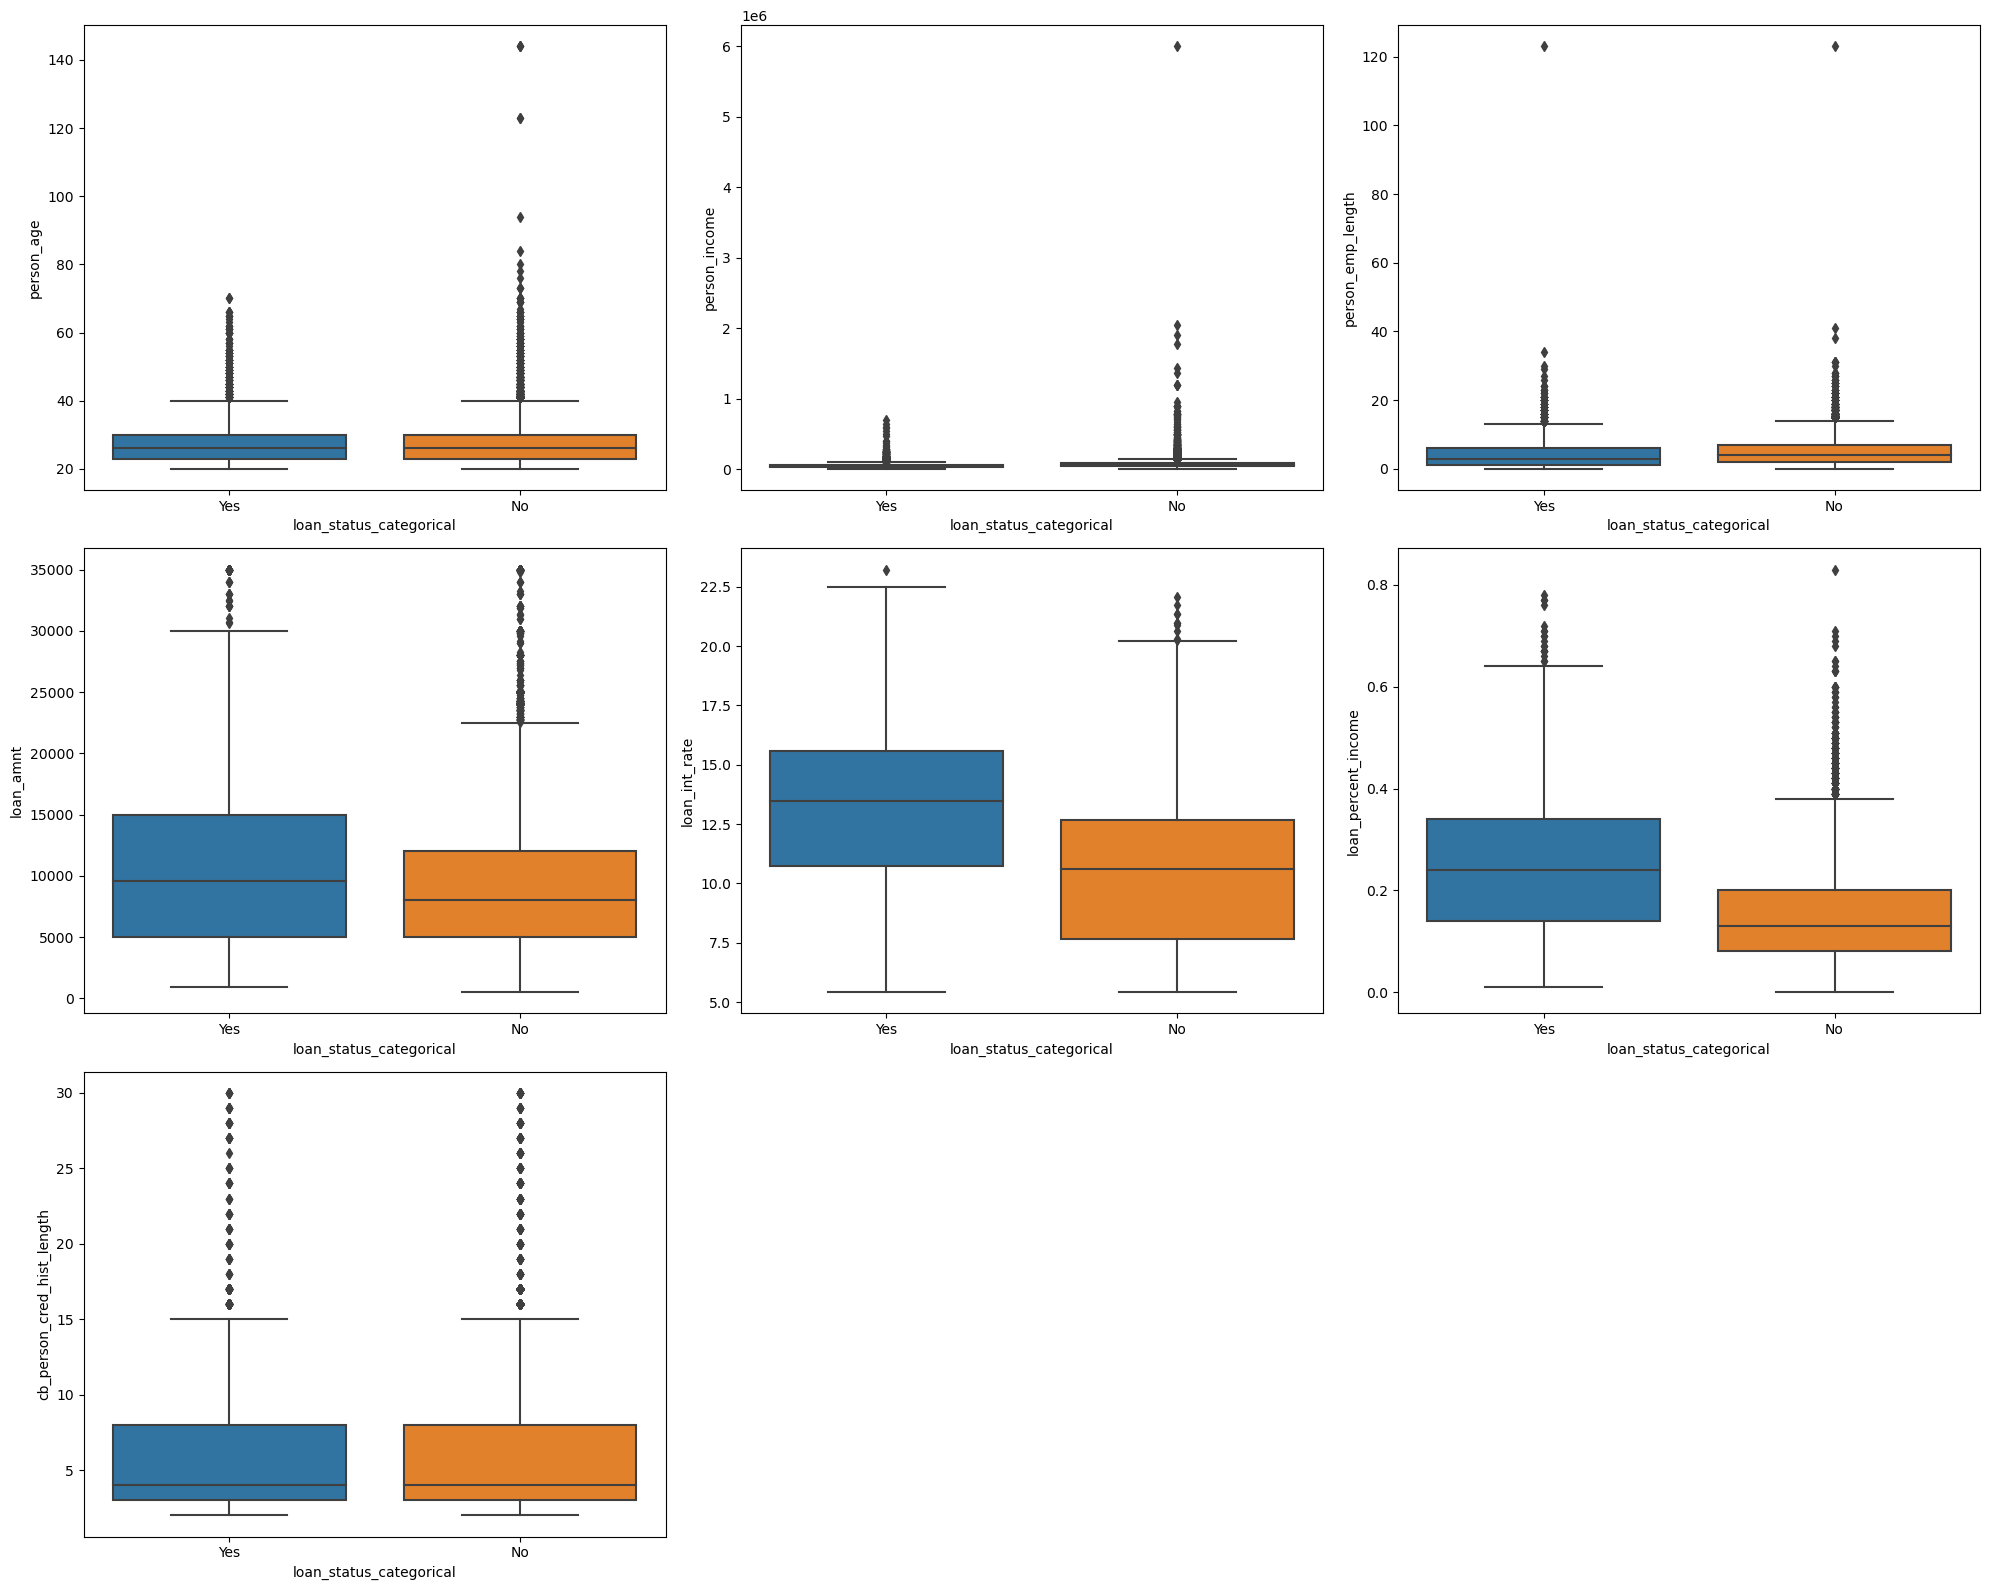

In [26]:
numeric_col = dfmul_num.select_dtypes(include=['int64','float64'])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))

axes = axes.flatten()

for i, column in enumerate(numeric_col):
    ax = axes[i]  
    sns.boxplot(data=dfmul_num, x='loan_status_categorical', y=column, ax=ax) 
    ax.set_xlabel('loan_status_categorical')
    ax.set_ylabel(column)

for j in range(len(numeric_col.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

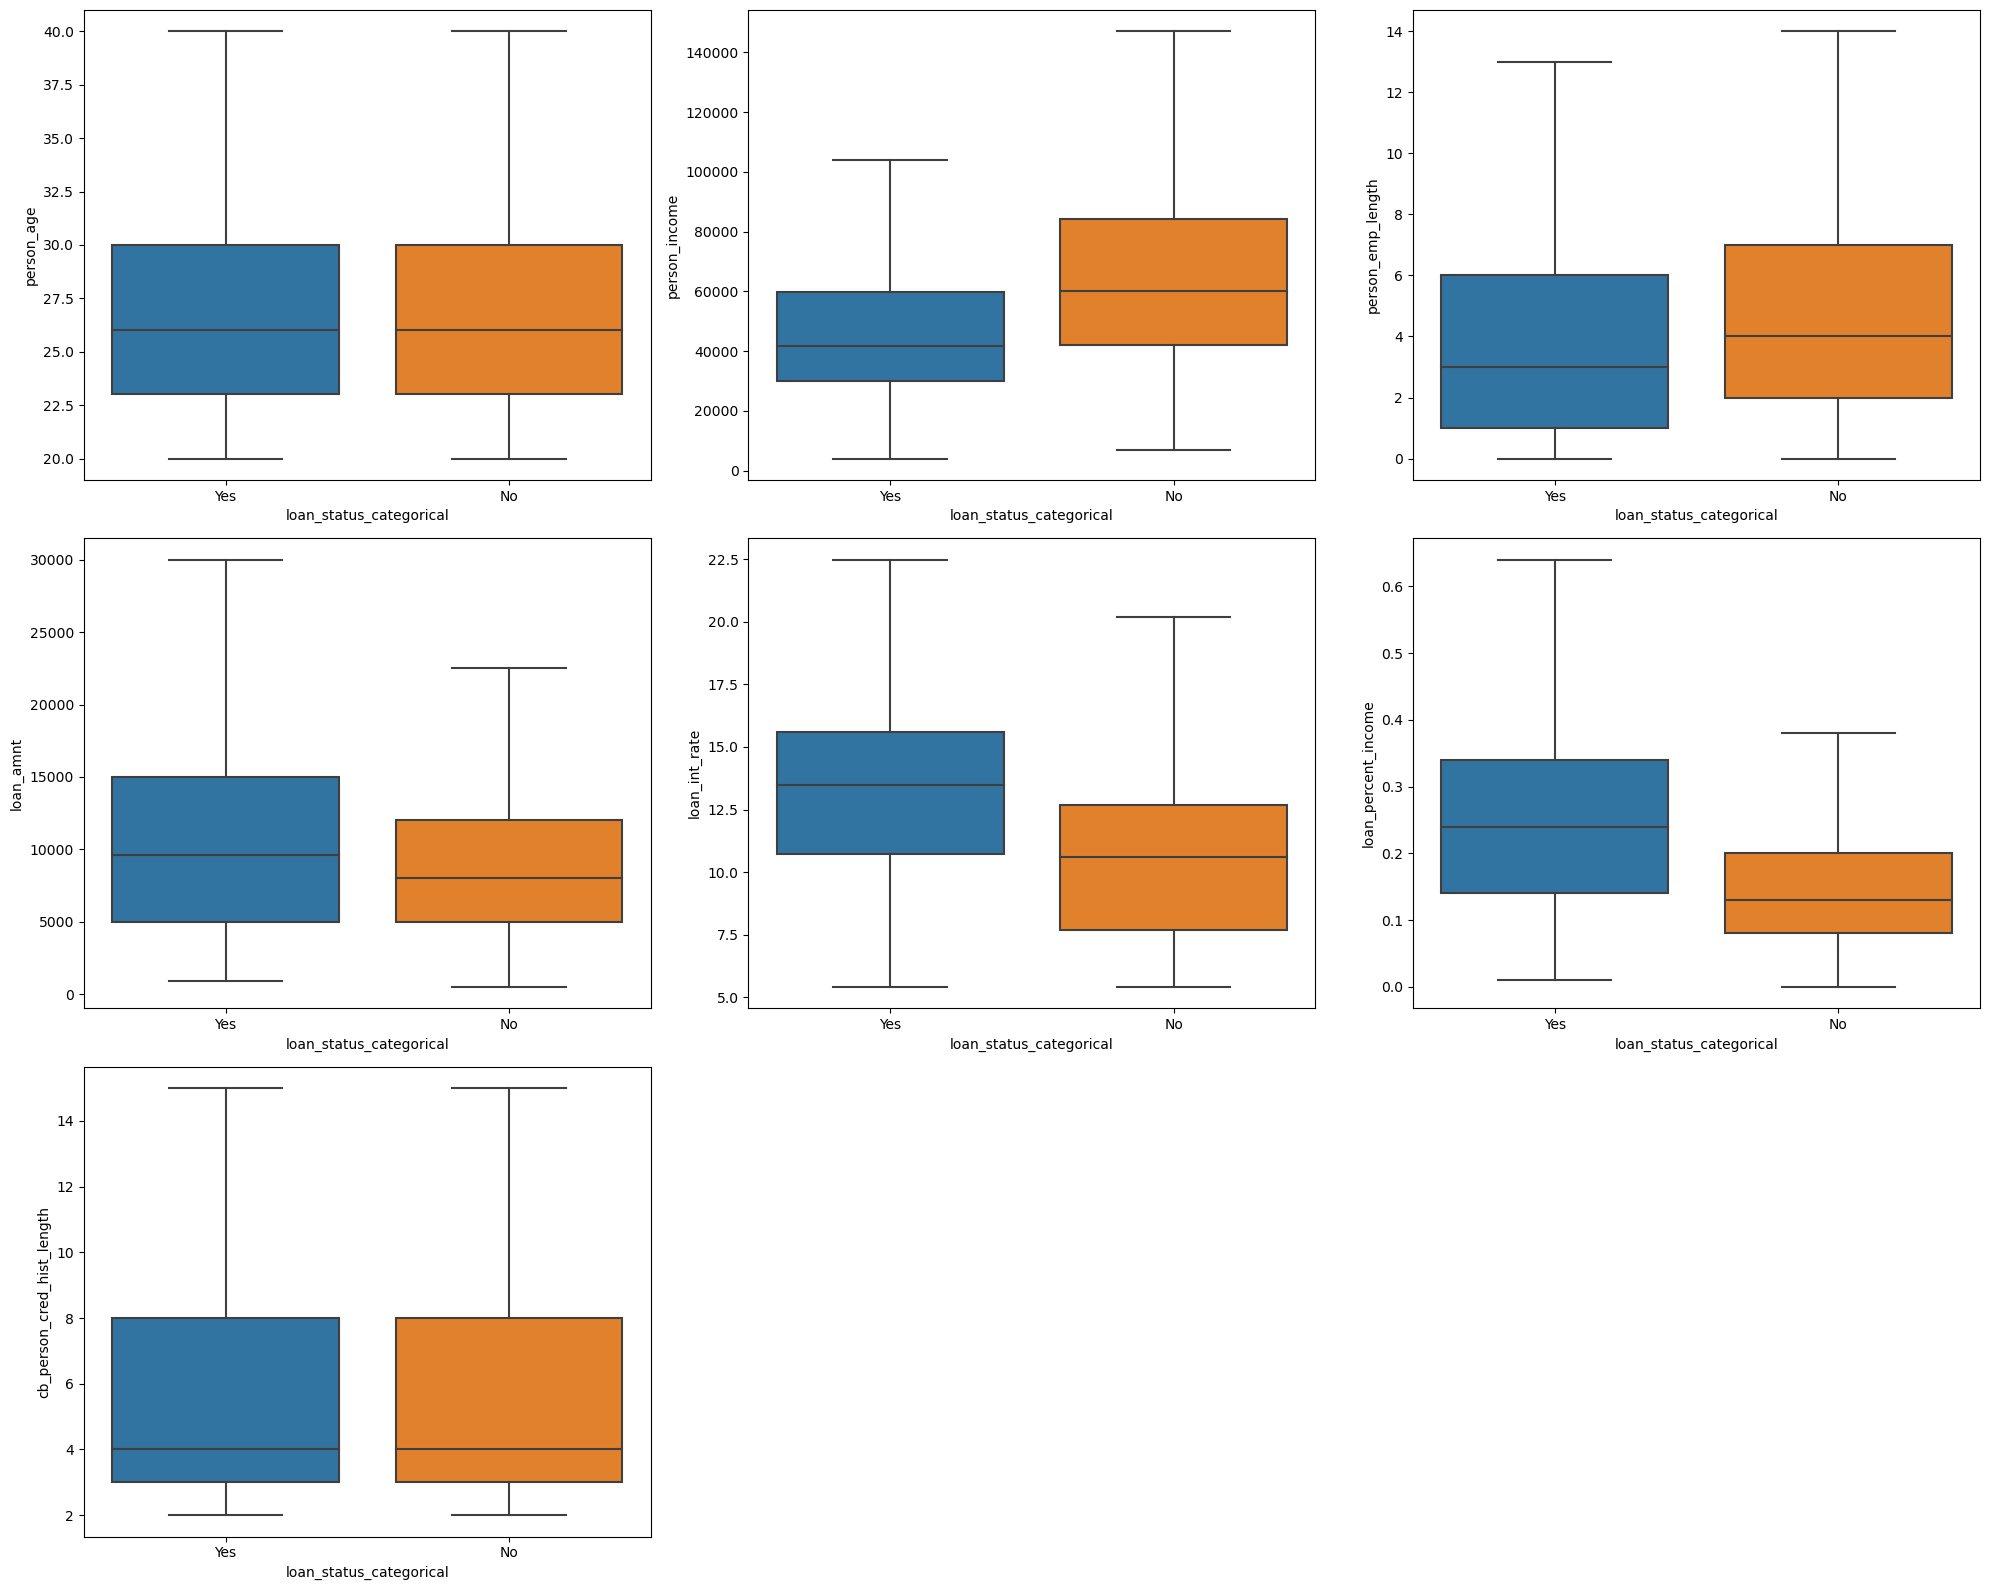

In [27]:
##Ketika melakukan trim/capping pada outliers, berikut adalah data yang dihasilkan. Namun akan ada banyak informasi penting
##yang akan terbuang dikarenakan proses trimming/capping.
numeric_col = dfmul_num.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))

axes = axes.flatten()

for i, column in enumerate(numeric_col):
    ax = axes[i]
    sns.boxplot(data=dfmul_num, x='loan_status_categorical', y=column, ax=ax, showfliers=False)
    ax.set_xlabel('loan_status_categorical')
    ax.set_ylabel(column)

for j in range(len(numeric_col.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

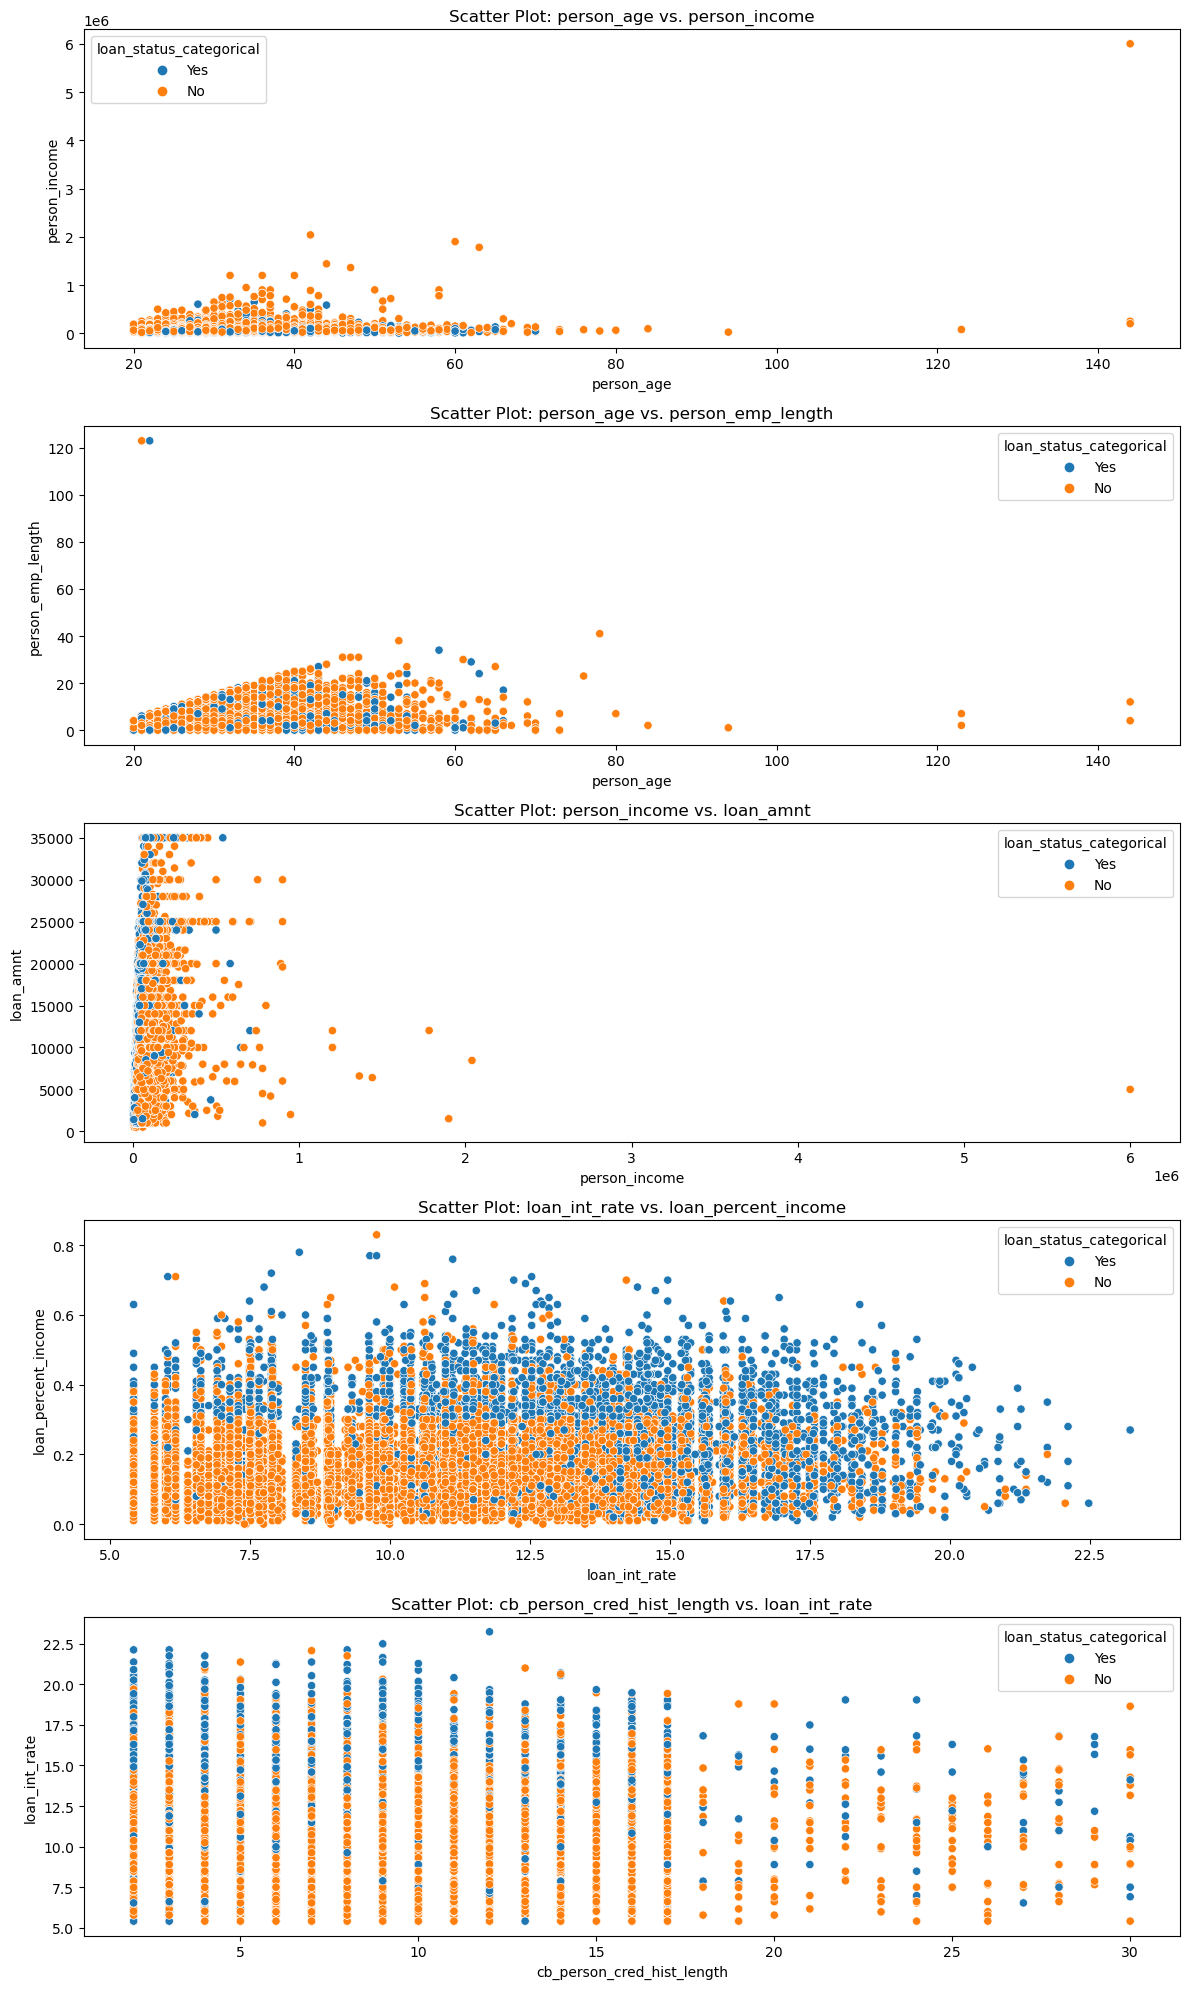

In [43]:
variable_pairs = [('person_age', 'person_income'),
                  ('person_age', 'person_emp_length'),
                  ('person_income', 'loan_amnt'),
                  ('loan_int_rate', 'loan_percent_income'),
                  ('cb_person_cred_hist_length', 'loan_int_rate')]


fig, axes = plt.subplots(nrows=len(variable_pairs), figsize=(12, 4 * len(variable_pairs)))

for i, (var1, var2) in enumerate(variable_pairs):
    ax = axes[i]
    sns.scatterplot(data=dfmul_num, x=var1, y=var2, hue='loan_status_categorical', ax=ax)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title(f'Scatter Plot: {var1} vs. {var2}')

plt.tight_layout()
plt.show()

Trimming akan dilakukan untuk data person_age diatas 80 tahun. Karena data tersebut merupakan outlierrs, dan di dunia nyata batas maksimal usia pekerja adalah 65 tahun. Asumsikan bahwa diatas 65 tahun, orang tersebut masih dapat mencicil hutang dengan dana pensiun. Namun kita membatasi sampai usia 80 tahun. Person_emp_length akan dilakukan proses trimming pada orang yang memiliki person_emp_length lebih dari 60 tahun. 

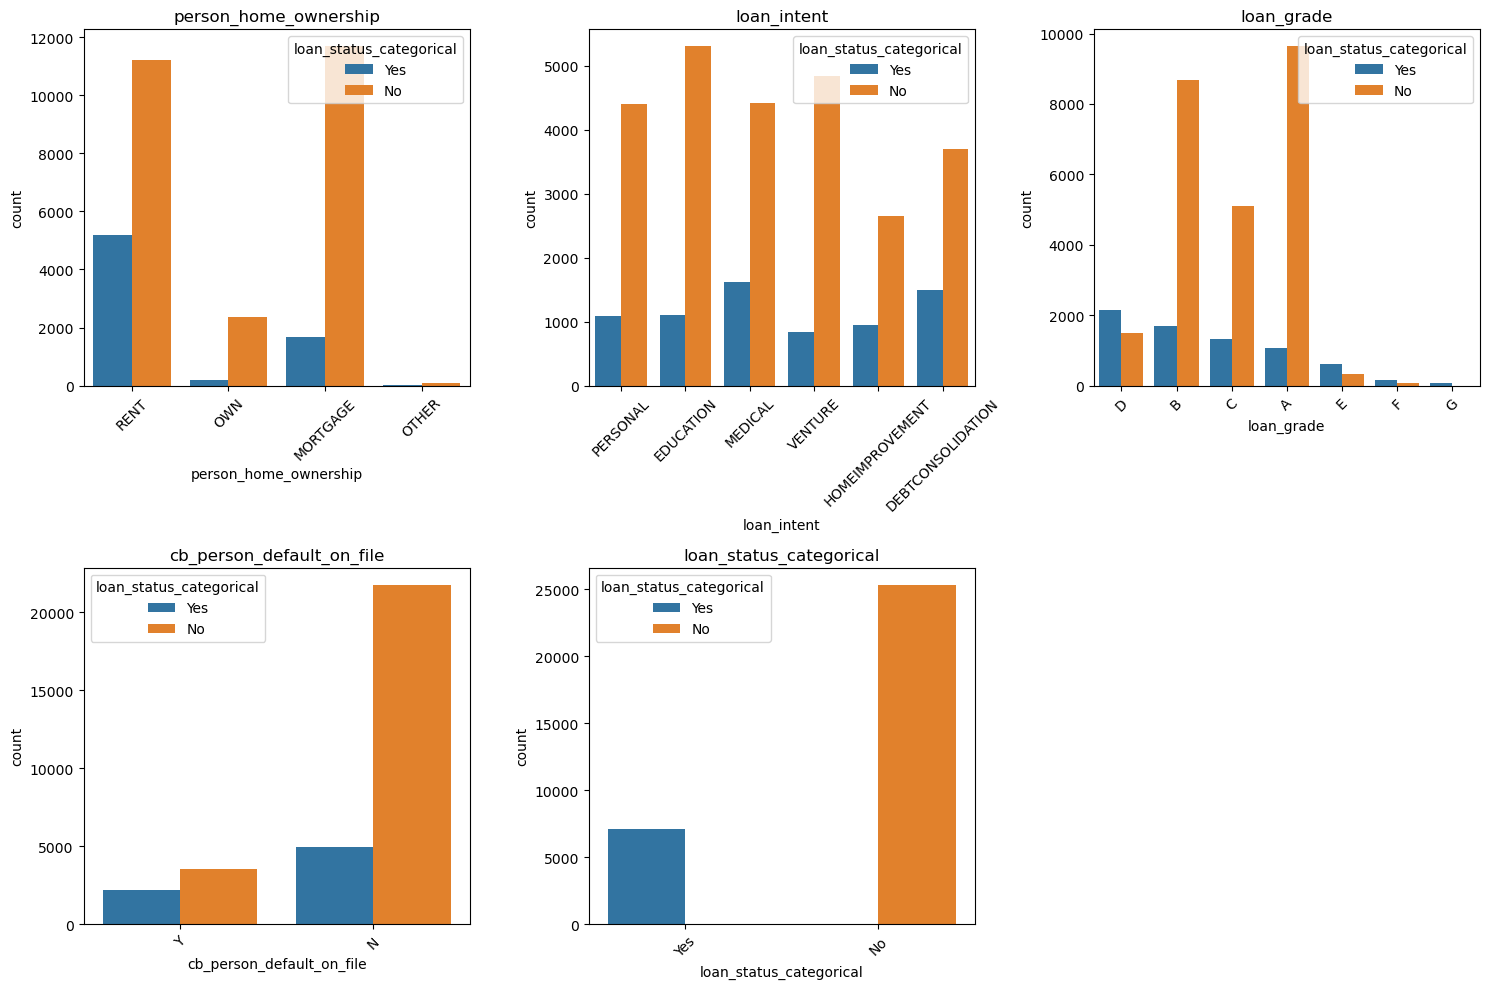

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

num_plots = min(3, len(cat_columns))

for i, column in enumerate(cat_columns[:num_plots]):
    row = i // 3  
    col = i % 3  
    
    sns.countplot(x=column, hue='loan_status_categorical', data=cat_columns, ax=axes[row, col])
    
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', labelrotation=45)

for j in range(len(cat_columns.columns), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()

plt.show()

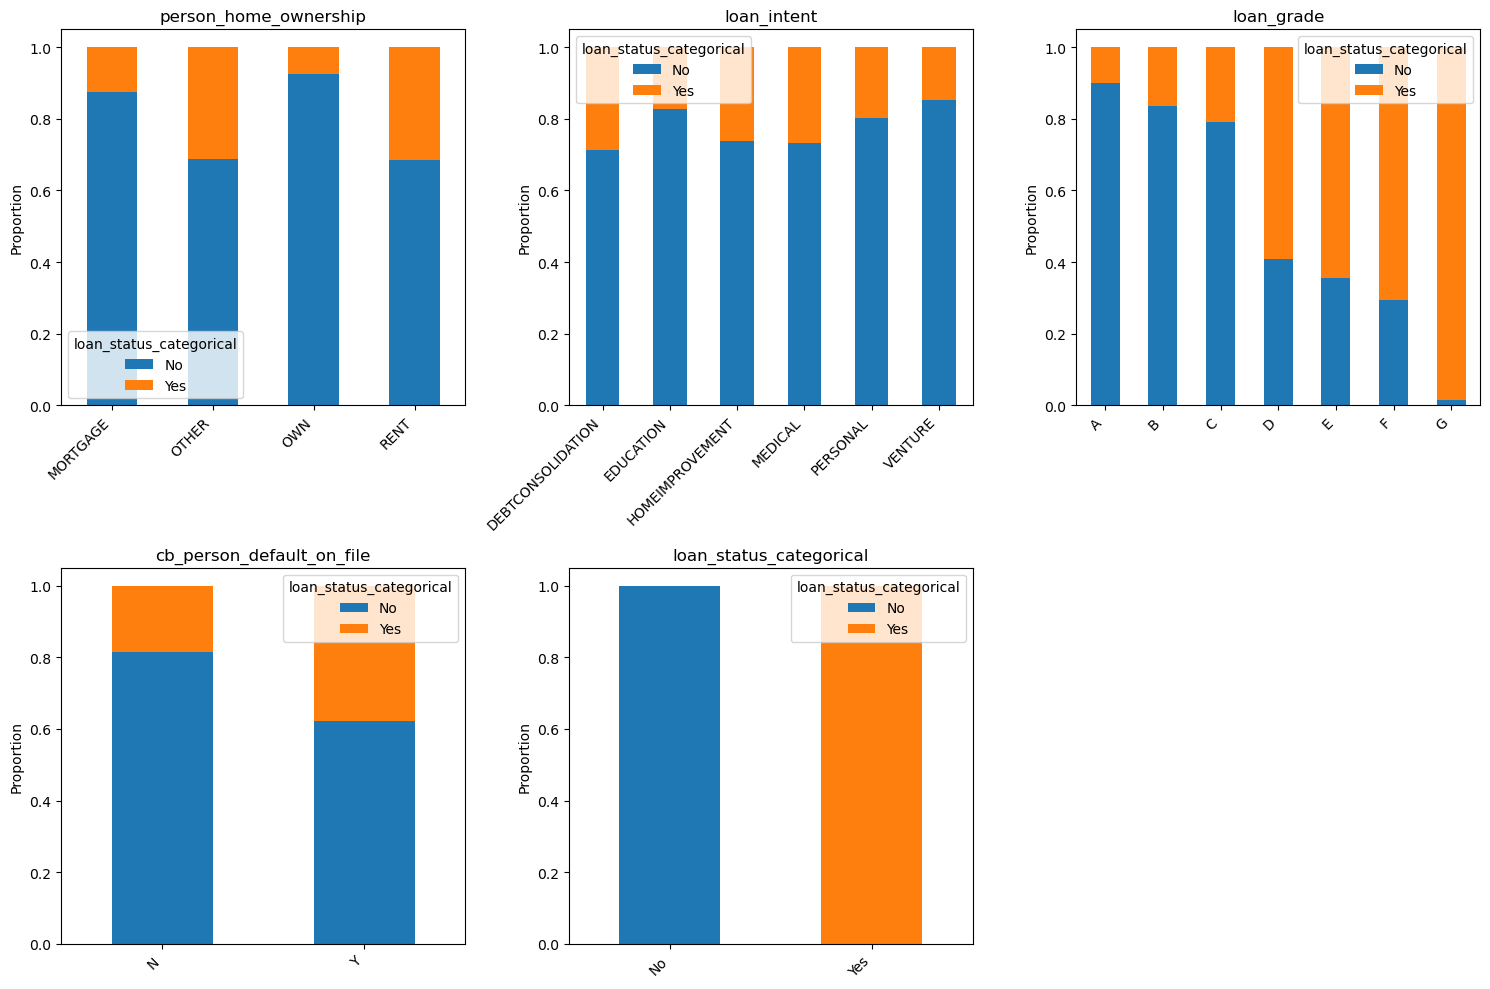

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    ax = axes[i]

    proportions = dfd.groupby(col)['loan_status_categorical'].value_counts(normalize=True).unstack()

    proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for j in range(len(cat_columns.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [79]:
dff = dfd[dfd['person_age']<=80]
dff

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_categorical
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Yes
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,No
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Yes
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Yes
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,No
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,No
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,Yes
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,No


In [80]:
dff = dff[dff['person_emp_length']<=60]
dff

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_categorical
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,No
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Yes
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Yes
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Yes
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,No
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,No
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,Yes
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,No


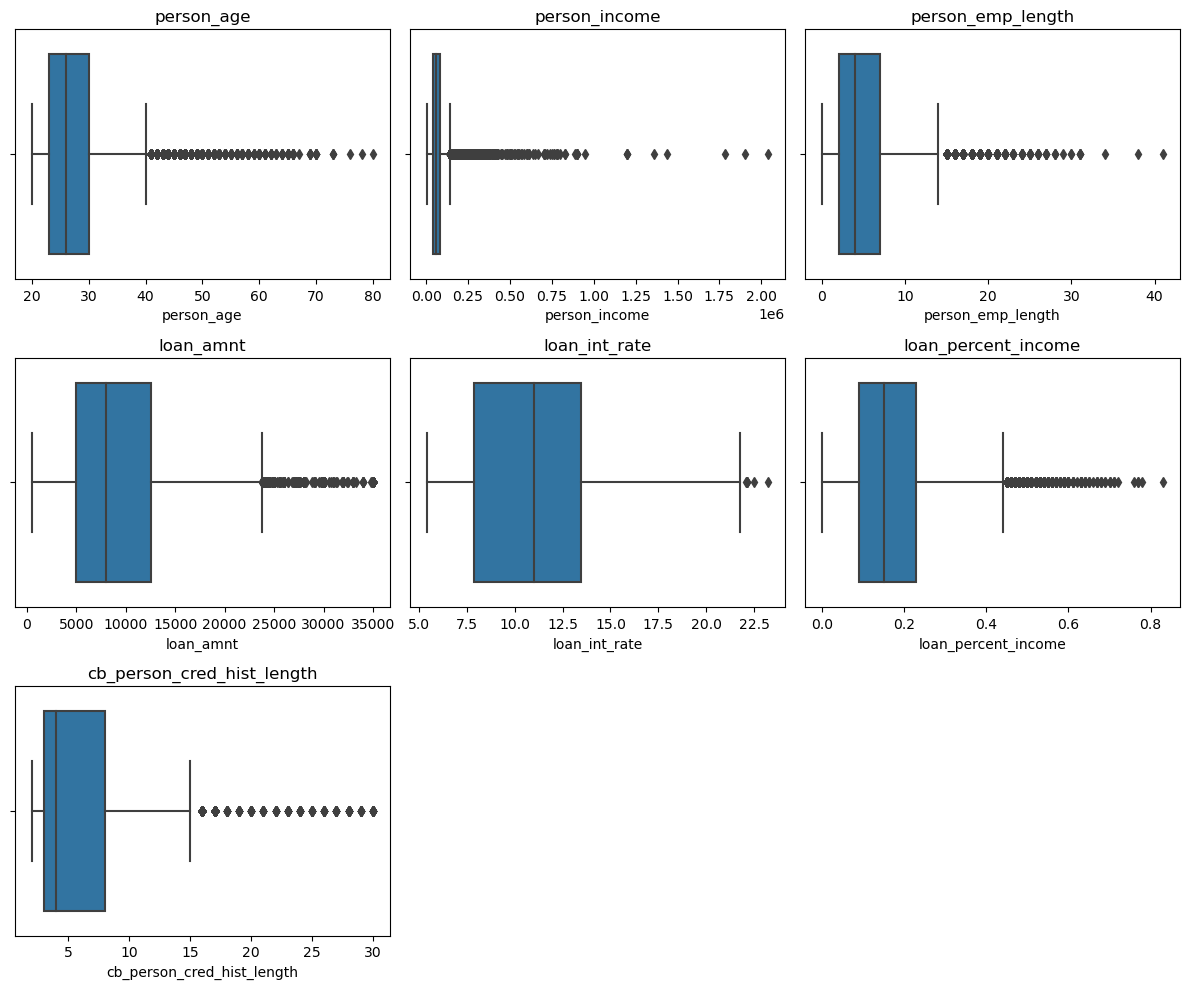

In [50]:
###melakukan pengecekan ulang outliers di data baru
columns_to_check = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Loop through the specified columns
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=dff[column], ax=axes[i])
    axes[i].set_title(column)

# Turn off empty subplots
for j in range(len(columns_to_check), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Jumlah outliers tidak sepenuhnya hilang, namun telah terkurangi. Selanjutnya akan diterapkan metode imputasi penggabungan dengan NaN values menggunakan algoritma random forest.

In [51]:
dff.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status_categorical          0
dtype: int64

In [67]:
###Metode imputing, akan dinilai mempengaruhi hasil prediksi jika seluruh outliers diganti dengan nilai baru. Untuk itu, kita
###berfokus pada variabel person_income untuk mengecek nilai 50% mendekati jumlah maksimum.
income_threshold = dff['person_income'].max() * 0.2

high_income = dff[dff['person_income'] >= income_threshold]
high_income

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_categorical
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,No
15911,24,425000,MORTGAGE,8.0,EDUCATION,A,10000,7.88,0,0.02,N,2,No
15914,25,450000,MORTGAGE,9.0,DEBTCONSOLIDATION,B,35000,11.11,0,0.08,N,4,No
15915,26,480000,MORTGAGE,2.0,EDUCATION,E,25000,14.38,0,0.05,N,3,No
17541,24,425000,MORTGAGE,8.0,EDUCATION,A,10000,7.88,0,0.02,N,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30,No
32543,52,720000,MORTGAGE,1.0,PERSONAL,A,7925,8.94,0,0.01,N,30,No
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,0.01,N,20,No
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21,No


In [68]:
high_income.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,75.000000,7.500000e+01,75.000000,75.000000,67.000000,75.000000,75.000000,75.000000
mean,37.533333,7.033262e+05,6.826667,14384.666667,11.318358,0.093333,0.024800,11.800000
std,8.536620,3.354427e+05,5.027958,9562.722258,3.067400,0.292858,0.021458,5.789086
min,23.000000,4.080000e+05,0.000000,1000.000000,5.420000,0.000000,0.000000,2.000000
25%,32.000000,4.899000e+05,3.000000,6500.000000,8.940000,0.000000,0.010000,8.000000
50%,36.000000,6.000000e+05,5.000000,12000.000000,11.360000,0.000000,0.020000,11.000000
75%,41.500000,7.800000e+05,9.500000,24500.000000,13.800000,0.000000,0.040000,15.000000
max,63.000000,2.039784e+06,19.000000,35000.000000,18.430000,1.000000,0.090000,30.000000


In [69]:
income_threshold

407956.80000000005

In [65]:
low_threshold = dff['person_income'].max() * 0.2
low_income = dff[dff['person_income'] <= low_threshold]
low_income

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_categorical
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,No
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Yes
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Yes
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Yes
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,No
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,No
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,Yes
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,No


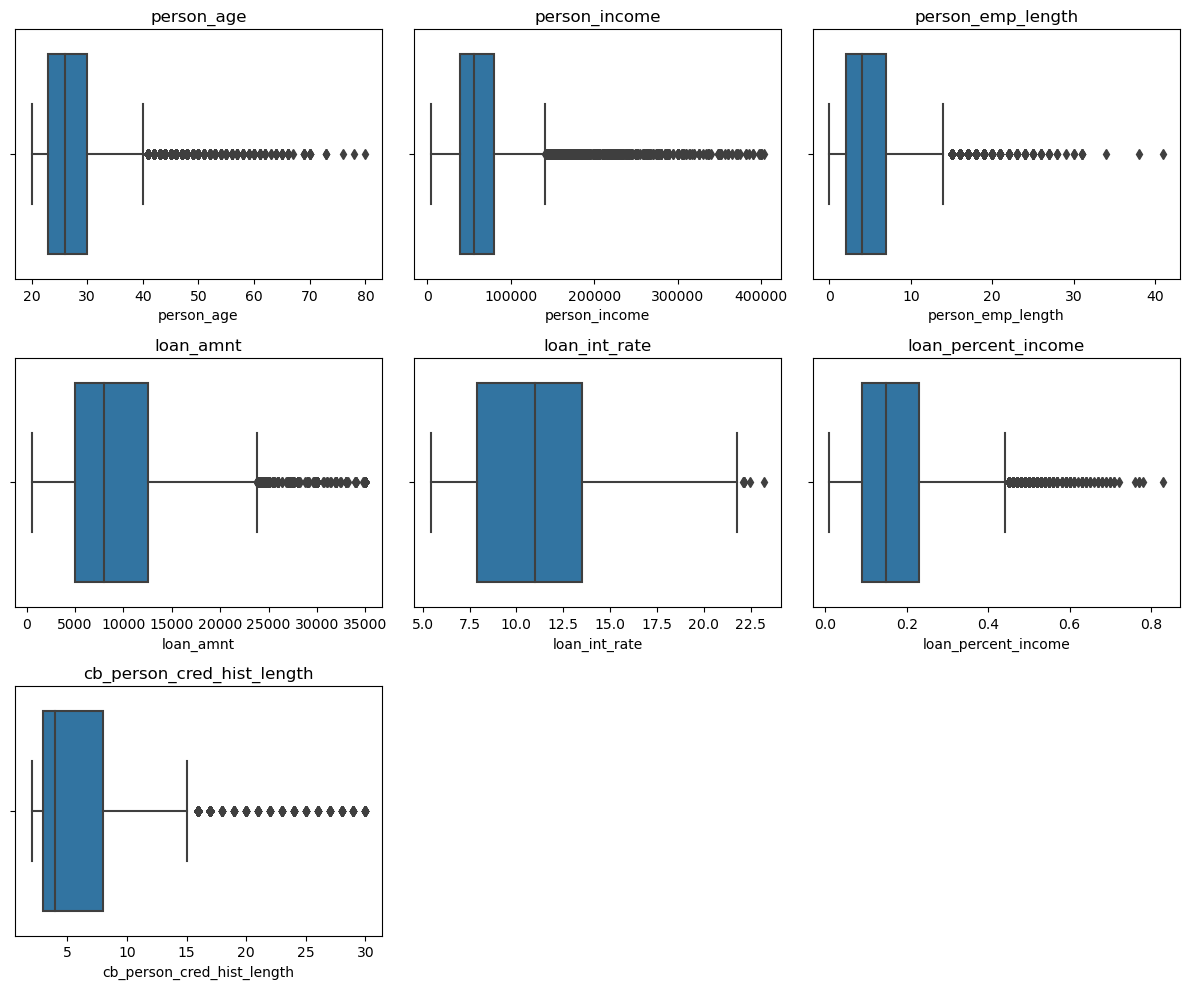

In [66]:
###melakukan pengecekan ulang outliers di data baru
columns_to_check = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Loop through the specified columns
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=low_income[column], ax=axes[i])
    axes[i].set_title(column)

# Turn off empty subplots
for j in range(len(columns_to_check), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Proses Imputing dan Resample

In [81]:
dfp = dff.copy()

In [82]:
dfp.loc[dfp['person_income'] >= income_threshold, 'person_income'] = np.nan

In [83]:
dfp.isna().sum()

person_age                       0
person_income                   75
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status_categorical          0
dtype: int64

In [96]:
dfp.drop(columns=['loan_status_categorical'],inplace=True)

In [94]:
import sklearn.neighbors._base 
import miceforest as mf
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [97]:
cat_variables = dfp[['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
dfp = dfp.drop(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'], axis=1)
dfp = pd.concat([dfp, cat_dummies], axis=1)
dfp.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600.0,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600.0,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500.0,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400.0,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900.0,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
dfp = pd.DataFrame(scaler.fit_transform(dfp), columns = dfp.columns)
dfp.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.016667,0.014009,0.121951,0.014493,0.321348,0.0,0.120482,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.083333,0.014009,0.024390,0.144928,0.418539,1.0,0.686747,0.035714,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.050000,0.153846,0.097561,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.066667,0.126079,0.195122,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.016667,0.014759,0.048780,0.057971,0.096629,1.0,0.301205,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
imputer = MissForest()

X_imputed = imputer.fit_transform(dfp)

df_imputed = pd.DataFrame(X_imputed, columns=dfp.columns)

C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


In [102]:
df_imputed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64

#### Melihat data akhir yang telah melewati proses imputing

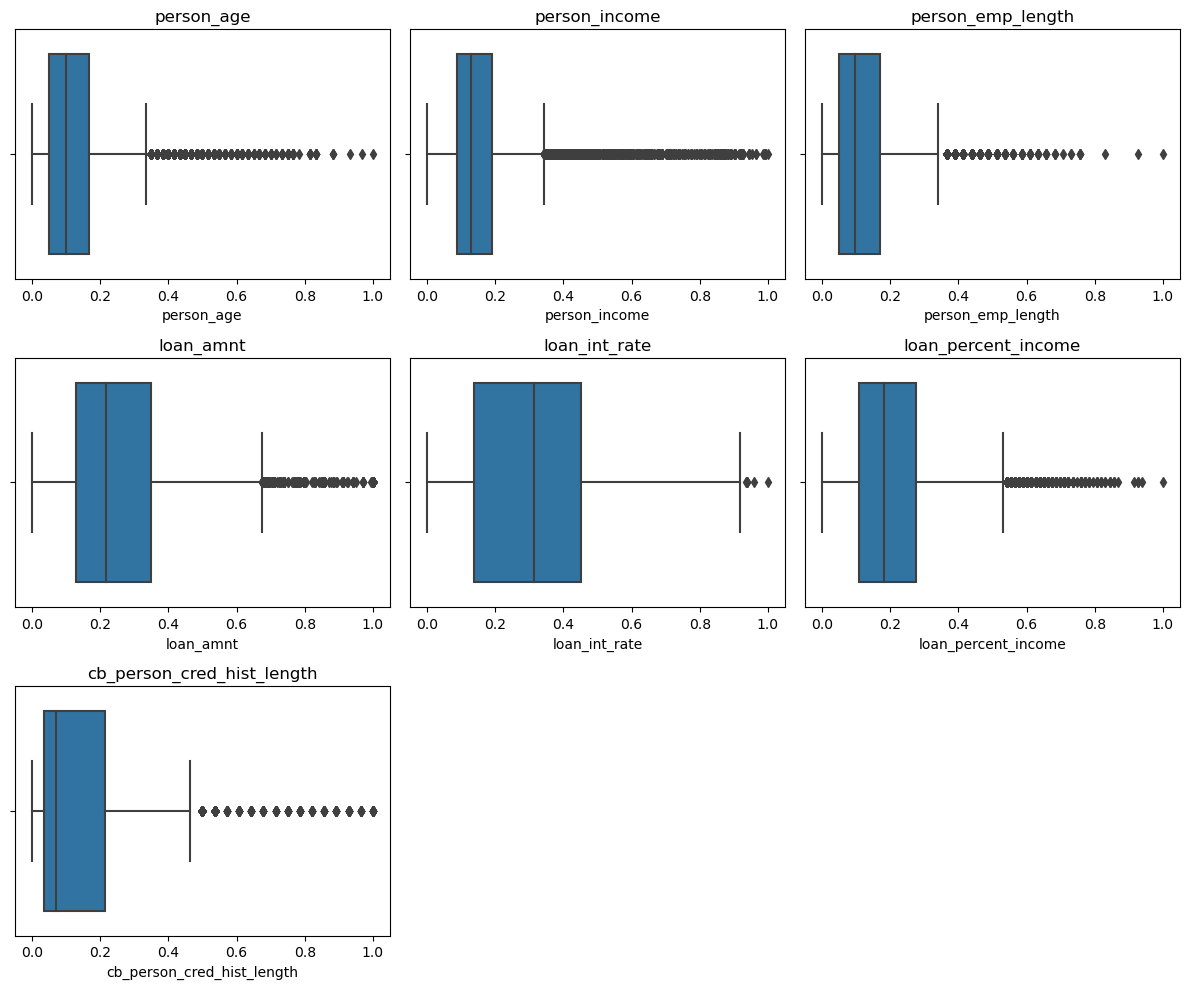

In [103]:
###melakukan pengecekan ulang outliers di data baru
columns_to_check = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()


for i, column in enumerate(columns_to_check):
    sns.boxplot(x=df_imputed[column], ax=axes[i])
    axes[i].set_title(column)


for j in range(len(columns_to_check), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

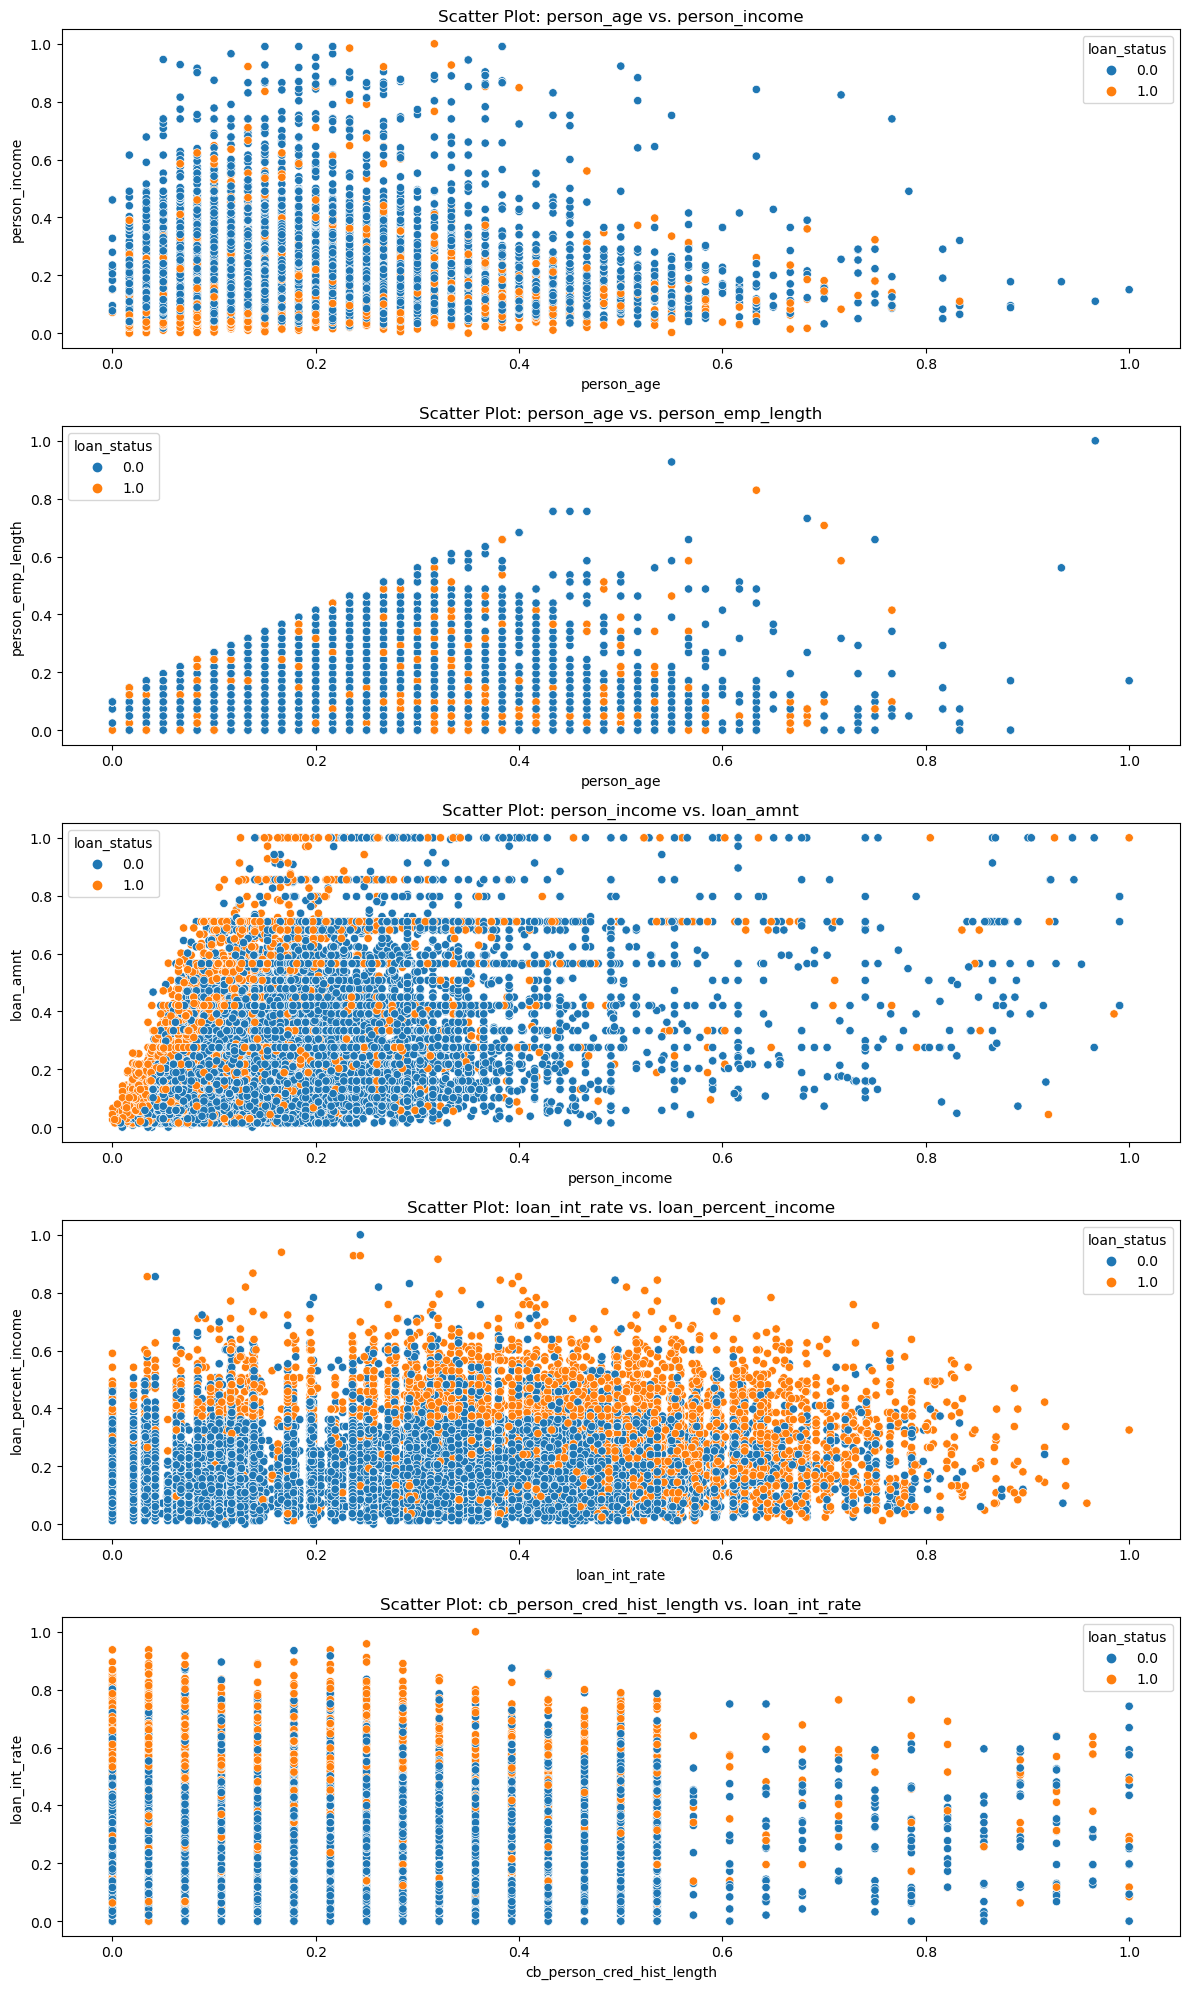

In [106]:
dfmul_num_fin = df_imputed.select_dtypes(include=['int64','float64'])
variable_pairs = [('person_age', 'person_income'),
                  ('person_age', 'person_emp_length'),
                  ('person_income', 'loan_amnt'),
                  ('loan_int_rate', 'loan_percent_income'),
                  ('cb_person_cred_hist_length', 'loan_int_rate')]


fig, axes = plt.subplots(nrows=len(variable_pairs), figsize=(12, 4 * len(variable_pairs)))

for i, (var1, var2) in enumerate(variable_pairs):
    ax = axes[i]
    sns.scatterplot(data=dfmul_num_fin, x=var1, y=var2, hue='loan_status', ax=ax)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title(f'Scatter Plot: {var1} vs. {var2}')

plt.tight_layout()
plt.show()

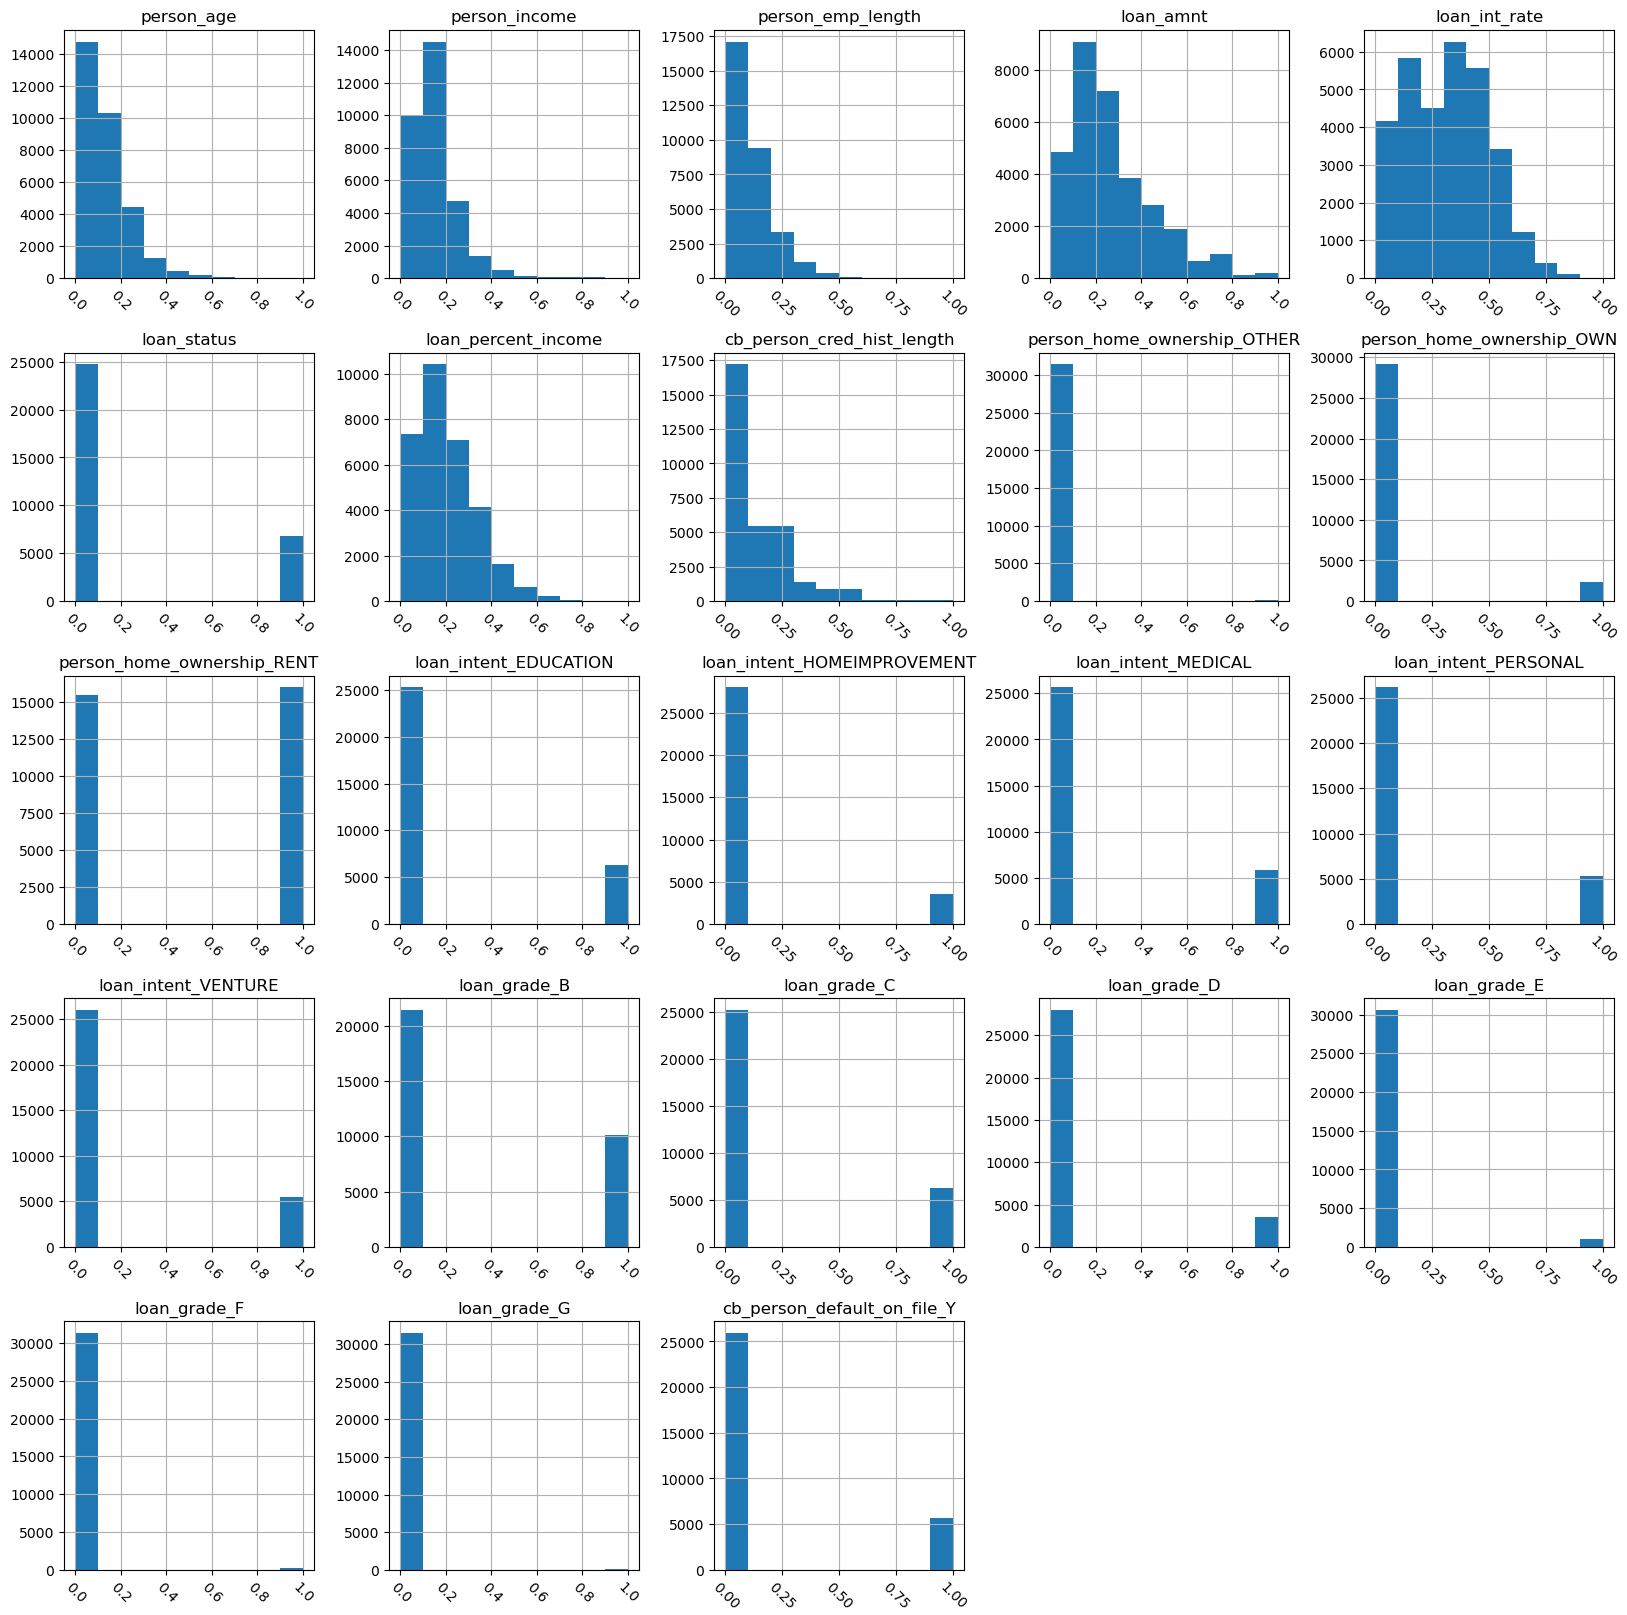

In [107]:
df_imputed.hist(figsize=(20,20), xrot=-45)
plt.show()

Data tersebut sudah terdistribusi, jumlah outliers masih ada. Namun tidak sebanyak di awal sebelum di processing. Selanjutnya akan dilakukan metode resampling.

In [110]:
from imblearn.over_sampling import SMOTE

### Sebelum melakukan resampling, dilakukan pembagian dataset

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
df_imputed.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [118]:
X = df_imputed.drop('loan_status', axis=1)
y = df_imputed['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
smote = SMOTE(sampling_strategy='auto', random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [120]:
y_train_resampled.value_counts()

0.0    19714
1.0    19714
Name: loan_status, dtype: int64

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [123]:
svm_classifier = SVC(kernel='linear', random_state=42) 

In [124]:
svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [125]:
y_pred = svm_classifier.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [135]:
def report(model):
    preds = model.predict(X_test)
    print("Classification Report:\n")
    print(classification_report(y_test, preds))
    
    # Create a confusion matrix plot
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      4999
         1.0       0.55      0.75      0.63      1305

    accuracy                           0.82      6304
   macro avg       0.74      0.79      0.76      6304
weighted avg       0.85      0.82      0.83      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

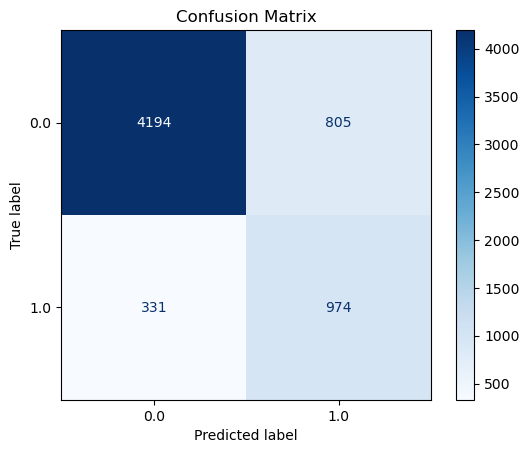

In [138]:
report(svm_classifier)

In [149]:
#svm dengan rbf kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_resampled, y_train_resampled)

SVC()

SVM dengan kernel rbf
Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      4999
         1.0       0.65      0.73      0.69      1305

    accuracy                           0.86      6304
   macro avg       0.79      0.81      0.80      6304
weighted avg       0.87      0.86      0.87      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

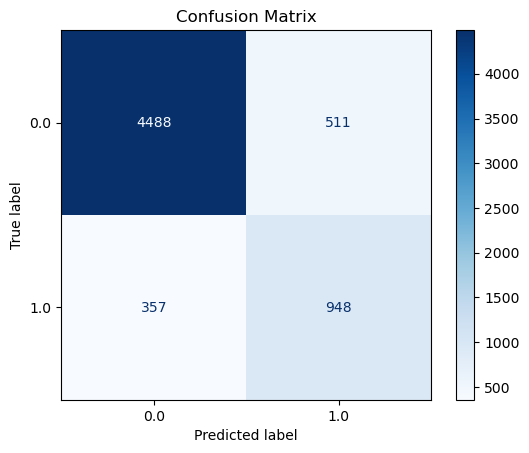

In [151]:
print('SVM dengan kernel rbf')
report(svc_rbf)

In [152]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()

In [153]:
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

Naive bayes
Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      4999
         1.0       0.74      0.23      0.35      1305

    accuracy                           0.82      6304
   macro avg       0.79      0.60      0.63      6304
weighted avg       0.81      0.82      0.79      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

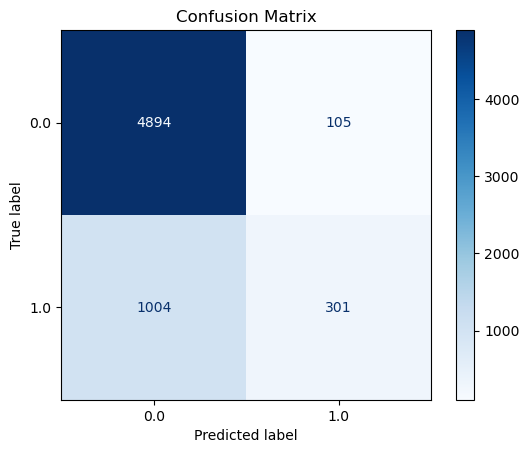

In [154]:
print('Naive bayes')
report(naive_bayes_classifier)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Logistic regression
Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      4999
         1.0       0.52      0.76      0.62      1305

    accuracy                           0.81      6304
   macro avg       0.73      0.79      0.75      6304
weighted avg       0.85      0.81      0.82      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

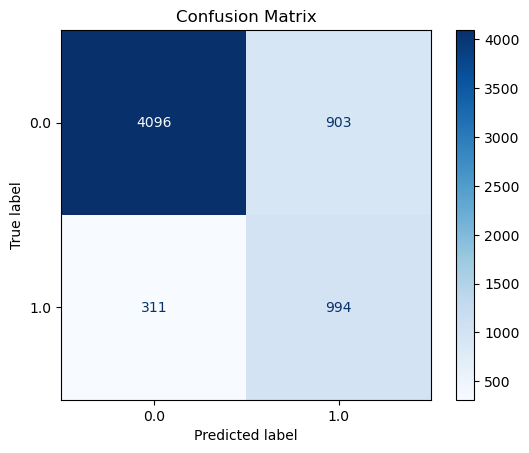

In [157]:
print('Logistic regression')
report(logistic_regression_classifier)

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

Decision Tree
Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      4999
         1.0       0.65      0.74      0.70      1305

    accuracy                           0.87      6304
   macro avg       0.79      0.82      0.80      6304
weighted avg       0.87      0.87      0.87      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

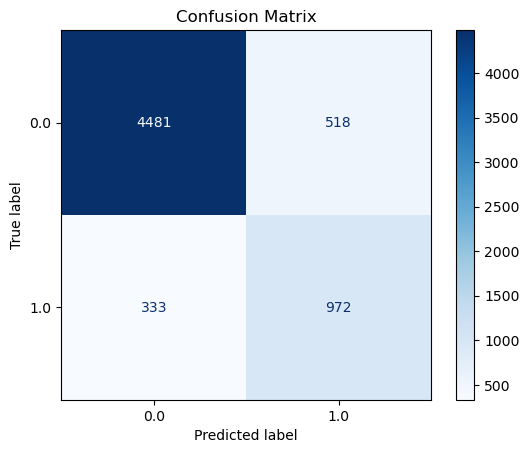

In [161]:
print('Decision Tree')
report(decision_tree_classifier)

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbor


C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      4999
         1.0       0.55      0.74      0.63      1305

    accuracy                           0.82      6304
   macro avg       0.74      0.79      0.76      6304
weighted avg       0.85      0.82      0.83      6304



C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 800x600 with 0 Axes>

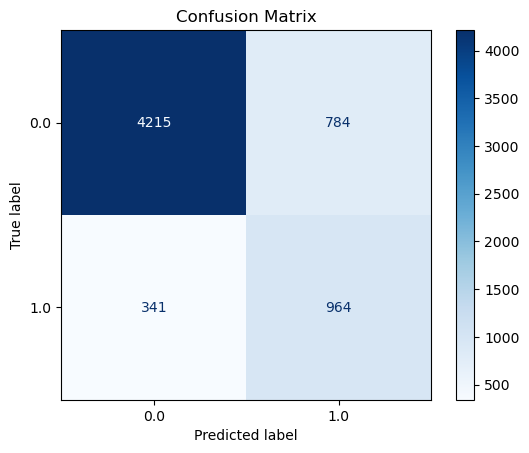

In [164]:
print('K-Nearest Neighbor')
report(knn_classifier)